# Estudo de caso em Telecomunicação: Rotatividade

## Proposta de projeto: Previsão de rotatividade de clientes de alto valor

Quando eu era criança, vi uma pessoa da minha família, que foi até uma cartomante dizendo que gostaria de saber o seu futuro. Eu lembro de ter pensado: "Será verdade? Será que é possível saber o futuro?". Não seria maravilhoso poder prever quando o seu cliente irá trocar para o concorrente?  Isso lhe daria o poder de evitar que isso ocorra. Sem dúvida todo mundo gostaria de poder prever o futuro.

Caro amigo isso é possível nos dias de hoje! Esqueça a bola de cristal ou as cartas, isso não é nada sobrenatural, apenas ciência aplicada. A quarta revolução industrial, a ciência de dados, com ajuda da programação, a inteligência artificial, machine learning e deep learning nos dão essa possibilidade.

Neste projeto iremos utilizar algumas dessas técnicas para podermos prever um determinado comportamento frequente e comum do cliente atual de serviços em telecomunicação: a rotatividade. Quando o cliente troca da minha operadora de serviços em telecomunicações para outra operadora concorrente chamaremos esse comportamento de rotatividade.

O mercado de serviços em telecomunicação, possui uma competição acirradíssima entre as empresas, para obter e manter um cliente fixo a seus serviços. É comum um cliente de uma operadora efetuar a rotatividade. O nosso foco nesse projeto não é dar solução para a busca de novos clientes, mas, ajudar a manter o cliente atual. Imagine só, poder saber quando o cliente vai trocar de empresa e poder oferecer uma proposta para manter a satisfação contínua do cliente. É simplesmente sensacional!

Este projeto aborda a previsão da rotatividade exclusivamente do cliente de alto valor. Por quê? A resposta é simples, o cliente de alto valor é aquele que gera em média 80% da receita total de uma empresa. Pretendo fazer um outro trabalho abordando o outro cliente em uma próxima oportunidade.

Este projeto também não tem o objetivo de descobrir as possíveis causas da rotatividade, apesar de ser um bom tema para explorar em outro projeto, mas, em estabelecer padrões de comportamento do cliente de alto valor, através dos dados, de forma a podermos saber se aquele cliente em um futuro próximo pode efetuar a rotatividade ou não. O dataset utilizado é público, e, disponibilizado na internet em comunidade científica especializada na área de desenvolvimento.

O principal benefício deste modelo, é dar à empresa a chance de poder fazer ação preventiva eficaz para manter o seu cliente uma vez que este modelo de machine learning irá prever quais clientes de alto valor irão ou não para o concorrente.

Um outro benefício, possibilitado por esse projeto, está em termos de economia de custos. Manter um cliente já existente é mais barato do que conseguir um novo. Algumas pesquisas americanas, apontam que em média custa de 8 a 10 vezes mais caro conseguir um cliente novo do que manter o cliente já existente. Gerando assim altíssima economia para o negócio.

## Bibliotecas necessárias para o projeto.

python: 3.8 <br>
numpy: 1.18.5 <br>
pandas: 1.0.5 <br>
seaborn: 0.10.1 <br>
matplotlib: 3.3.0 <br>
scipy: 1.5.2 <br>
sklearn: 0.22.2.post1

# Começando

###Dicionário dos atributos do Dataset: <br>

* MOBILE_NUMBER: Número de telefone do cliente; <br>
* CIRCLE_ID: Área do círculo de telecomunicações à qual o cliente pertence; <br>
* LOC: chamadas locais - dentro do mesmo círculo de telecomunicações; <br>
* STD: Chamadas STD, conhecida como discagem interurbana do assinante - fora do círculo de chamada; <br>
* IC: Chamadas recebidas;  <br>
* OG: Chamadas com origem no usuário;  <br>
* T2T: Operador T para T, ou seja, dentro da mesma operadora (móvel para móvel);<br>
* T2M: Operadora T para outra operadora móvel; <br>
* T2O: Operador T para outra operadora de linha fixa; <br>
* T2F: Operador T para linhas fixas de T; <br>
* T2C: Operadora para seu próprio call center; <br>
* ARPU: Receita média por usuário; <br>
* MOU: Minutos de uso - chamadas de voz; <br>
* AON: Tempo na mesma rede - número de dias que o cliente está usando a rede da operadora T; <br>
* ONNET: Todos os tipos de chamadas dentro da mesma rede operadora; <br>
* OFFNET: Todos os tipos de chamadas fora da rede da operadora T; <br>
* ROAM: Indica que o cliente está em zona de roaming durante a chamada; <br>
* SPL: chamadas especiais; <br>
* ISD: Chamadas em discagem direta internacional (DDI); <br>
* RECH: Recarga; <br>
* NUM: número; <br>
* AMT: Valor do montante na moeda local; <br>
* MAX: máximo; <br>
* DATA: Internet móvel; <br>
* 3G: Rede 3G; <br>
* AV: Média; <br>
* VOL: Volume de uso da Internet móvel (em MB); <br>
* 2G: Rede 2G; <br>
* PCK: Esquemas de serviço pré-pago  chamados - PACKS; <br>
* NIGHT: Esquema para usar apenas durante horas noturnas específicas; <br>
* MONTHLY: Esquemas de serviço com validade equivalente a um mês; <br>
* SACHET: Esquemas de serviço com validade inferior a um mês; <br>
* .6: KPI(Indicadores chave de performance) para o mês de junho; <br>
* .7: KPI(Indicadores chave de performance) para o mês de julho; <br>
* .8: KPI(Indicadores chave de performance) para o mês de agosto; <br>
* .9: KPI(Indicadores chave de performance) para o mês de setembro; <br>
* FB_USER: Esquema de serviço para aproveitar os serviços do Facebook e sites de redes sociais semelhantes; <br>
* VBC: Custo baseado em volume  - quando nenhum esquema específico não é comprado e pago de acordo com o uso. <br>



In [1]:
# Importando as bibliotecas
import numpy as np #biblioteca utilizada para trabalhar com vetores e arrays
import pandas as pd #biblioteca para trabalhar com dataframes (planilhas excel) 

import datetime as dt #modulo para manipular datas e dados temporais

import matplotlib.pyplot as plt #biblioteca para criar gráficos "comuns" ao estilo Matlab
from matplotlib.gridspec import GridSpec #auxilia na criação de gráficos
import seaborn as sns #biblioteca utilizada para criar gráficos mais "bonitos"
sns.set(style="ticks")
%matplotlib inline

from scipy.stats import norm #import de "norm", contribui para a normalização da distribuição.
from scipy import stats #Este módulo contém um grande número de distribuições de probabilidade, bem como uma biblioteca crescente de funções estatísticas.

import sklearn #biblioteca para a aplicação das técnicas de machine learning.
from sklearn import metrics #Modulo do sklearn para verificarmos se o modelo está dentro das métricas pré estabelecidas.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

## Carregando os dados

In [2]:
data = pd.read_csv("./telecom_churn_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [3]:
#realizando a leitura do arquivo(dataset)
nome_do_arquivo = "telecom_churn_data.csv"
data = pd.read_csv(nome_do_arquivo) #Transformando o dataframe em pandas para as devidas manipulações

## Explorando os dados
Nesta seção, exploramos os dados através de visualizações e códigos para entender como cada atributo é relacionado a outros. Observamos as descrições estatísticas do conjunto de dados, considerando a relevância de cada atributo, e selecionando alguns exemplos de pontos de dados do conjunto de dados.

In [4]:
#Tras um resumo de informações resumidas a respeito do dataframe.
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
#Mostra as primeiras linhas do dataframe
data.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   
5     7000286308        109             0.0             0.0             0.0   
6     7001051193        109             0.0             0.0             0.0   
7     7000701601        109             0.0             0.0             0.0   
8     7001524846        109             0.0             0.0             0.0   
9     7001864400        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   
5            6/30/2014            7/31/2014            8/31/2014   
6            6/30/2014            7/31/2014            8/31/2014   
7            6/30/2014            7/31/2014            8/31/2014   
8            6/30/2014            7/31/2014            8/31/2014   
9            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100          NaN   
1            9/30/2014    34.047   355.074   268.321   86.285        24.11   
2            9/30/2014   167.690   189.058   210.226  290.714        11.54   
3            9/30/2014   221.338   251.102   508.054  389.500        99.91   
4            9/30/2014   261.636   309.876   238.174  163.426        50.31   
5            9/30/2014    50.258    58.810    83.386  170.826        50.16   
6            9/30/2014   429.023   190.704   255.114  114.751        71.03   
7            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8            9/30/2014   378.721   492.223   137.362  166.787       413.69   
9            9/30/2014   119.518   247.435   170.231  160.042        33.89   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   
5        43.63        85.48       138.79         19.28         13.44   
6        45.03        76.66        15.23        262.73         49.24   
7        54.68        52.29          NaN        453.43        567.16   
8       351.03        35.08        33.46         94.66         80.63   
9        30.11        22.43        27.84         63.48         54.16   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   
5         14.46         46.91           0.00           0.00           0.00   
6         92.08         50.33           0.00           0.00           0.00   
7        325.91           NaN          16.23          33.49          31.64   
8        136.48        108.71 

## Definição operacional de rotatividade

Clientes que não fizeram qualquer uso, seja de entrada ou saída - em termos de chamadas, internet etc. durante um período de tempo.
Aqui existe uma tentativa de manter os clientes de alto valor tentando prever o potencial risco de rotatividade destes. <br>

## Dataset
Nosso conjunto de dados é dividido em 3 partes, cada parte uma fase na qual o cliente possa vir a vivenciar: <br>

- Boa fase em que o cliente fica satisfeito com o atendimento; <br>

- Ponto de ação em que o cliente não estava satisfeito com o serviço ou recebeu uma oferta melhor do concorrente;
Obs: Nessa fase, o cliente costuma apresentar um comportamento diferente do que na fase boa. Além disso, é crucial identificar clientes que apresentam alto risco de rotatividade nesta fase, para que algumas ações corretivas possam ser tomadas neste momento para prever a rotatividade <br>

- Fase de rotatividade em que o cliente efetua o cancelamento e escolhe outra operadora.

Clientes de alto valor são aqueles que recarregaram com um valor maior ou igual a X, onde X é o 70º percentil do valor médio da recarga nos primeiros dois meses (a fase boa). <br>
<br>
Depois de identificar os clientes de alto valor, marcaremos os clientes de rotatividade com base naqueles que não fizeram nenhuma chamada (tanto de entrada quanto de saída) e não usaram a internet móvel mesmo uma vez na fase de rotatividade. <br>
<br>
Vamos primeiro identificar clientes de alto valor.

In [6]:
data['total_data_rech_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6'] #Número total de recargas efetuada no mês 6 multiplicado pelo valor médio do que foi gasto em recarga do mês 6 
data['total_data_rech_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7'] #O mesmo para o mês 7

data['amt_data_6'] = data[['total_rech_amt_6','total_data_rech_6']].sum(axis=1) #Somando as duas colunas com valores totais de recarga e formando uma só coluna para o mês 6.
data['amt_data_7'] = data[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)#O mesmo para o mês 7.

data['AVG_amt_data_6_7'] = data[['amt_data_6','amt_data_7']].mean(axis=1)#Fomando uma coluna com a média entre os valores do montante do mês 6 e do mês 7.

In [7]:
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [8]:
data[['total_rech_amt_6','total_rech_amt_7','AVG_amt_data_6_7']].quantile(np.linspace(.1, 1, 9, 0)) #gera valores em intervalos definidos baseados nas amostras e nos quartis definidos

total_rech_amt_6  total_rech_amt_7  AVG_amt_data_6_7
0.1               0.0               0.0              60.0
0.2              80.0              65.0             108.5
0.3             120.0             110.0             155.0
0.4             170.0             160.0             209.5
0.5             230.0             220.0             275.0
0.6             290.0             283.0             360.0
0.7             378.0             370.0             478.0
0.8             504.0             500.0             656.5
0.9             732.0             731.0            1028.0

De acordo com a definição de clientes de alto valor, são considerados aqueles cujo valor de recarga deve ser maior ou igual ao 70º percentil. <br>

Para obter um pouco mais de dados foi filtrado na forma maior ou igual. Obtive mais registros (cerca de 30.000) do que considerando apenas maior que. <br>

In [9]:
df = data[(data['AVG_amt_data_6_7']> data['AVG_amt_data_6_7'].quantile(0.7))] #Filtro para os clientes de alto valor

### Clientes que cancelaram.
<br>
Identificação de clientes de alto valor com base no último mês (no caso, mês 9). O argumento de busca do filtro é se o cliente não fez ou recebeu nenhuma chamada de voz no mês 9 e não utilizou dados 2G ou 3G durante o mesmo período. 'churn_flag' denotam os clientes que consideramos que efetuaram a rotatividade, isto é, estão utilizando serviços de outra operadora.

In [10]:
df['churn_flag'] = np.where(
                            ((df['total_ic_mou_9'] == 0.00) | (df['total_og_mou_9'] == 0.00))
                            & ((df['vol_2g_mb_9'] == 0.00) | (df['vol_3g_mb_9'] == 0.00))
                            , 1, 0
                           )#aqui setamos "1" para a condição (rotatividade) atendida e "0" para condição não atendida (não-rotatividade).

In [11]:
print(df['churn_flag'].value_counts()) #Mostra quantos clientes rotacionaram(flag = 1) e quantos não(flag = 0). 
print(df['churn_flag'].value_counts()/df.shape[0]) #Mostra a proporção.

0    26698
1     3255
Name: churn_flag, dtype: int64
0    0.89133
1    0.10867
Name: churn_flag, dtype: float64


Vamos eliminar todas features relacionadas à fase de churn, ou seja, 9º mês

In [12]:
df = df.drop(df.filter(regex='_9|sep', axis = 1).columns, axis=1) #eliminando as colunas relacionadas

In [13]:
df.info(verbose=True, null_counts=True) #Verificando o dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 177 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             29953 non-null  int64  
 1   circle_id                 29953 non-null  int64  
 2   loc_og_t2o_mou            29730 non-null  float64
 3   std_og_t2o_mou            29730 non-null  float64
 4   loc_ic_t2o_mou            29730 non-null  float64
 5   last_date_of_month_6      29953 non-null  object 
 6   last_date_of_month_7      29926 non-null  object 
 7   last_date_of_month_8      29788 non-null  object 
 8   arpu_6                    29953 non-null  float64
 9   arpu_7                    29953 non-null  float64
 10  arpu_8                    29953 non-null  float64
 11  onnet_mou_6               29411 non-null  float64
 12  onnet_mou_7               29417 non-null  float64
 13  onnet_mou_8               28781 non-null  float64
 14  offne

Check de valores nulos no dataframe.

In [14]:
df.isna().sum() 

mobile_number                   0
circle_id                       0
loc_og_t2o_mou                223
std_og_t2o_mou                223
loc_ic_t2o_mou                223
last_date_of_month_6            0
last_date_of_month_7           27
last_date_of_month_8          165
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                   542
onnet_mou_7                   536
onnet_mou_8                  1172
offnet_mou_6                  542
offnet_mou_7                  536
offnet_mou_8                 1172
roam_ic_mou_6                 542
roam_ic_mou_7                 536
roam_ic_mou_8                1172
roam_og_mou_6                 542
roam_og_mou_7                 536
roam_og_mou_8                1172
loc_og_t2t_mou_6              542
loc_og_t2t_mou_7              536
loc_og_t2t_mou_8             1172
loc_og_t2m_mou_6              542
loc_og_t2m_mou_7              536
loc_og_t2m_mou_8             1172
loc_og_t2f_mou

In [15]:
# Total de valores nulos (porcentagens)
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((df.isnull().sum()/len(df))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

feature  Missing%
145                 arpu_3g_8     46.80
151          night_pck_user_8     46.80
121  date_of_last_rech_data_8     46.80
127           max_rech_data_8     46.80
130           count_rech_2g_8     46.80
133           count_rech_3g_8     46.80
136        av_rech_amt_data_8     46.80
124         total_rech_data_8     46.80
166                 fb_user_8     46.80
148                 arpu_2g_8     46.80
149          night_pck_user_6     44.11
122         total_rech_data_6     44.11
134        av_rech_amt_data_6     44.11
119  date_of_last_rech_data_6     44.11
131           count_rech_3g_6     44.11
146                 arpu_2g_6     44.11
128           count_rech_2g_6     44.11
143                 arpu_3g_6     44.11
171         total_data_rech_6     44.11
125           max_rech_data_6     44.11
164                 fb_user_6     44.11
165                 fb_user_7     43.12
120  date_of_last_rech_data_7     43.12
123         total_rech_data_7     43.12
147                 arpu_2g_7     43.12
129           count_rech_2g_7     43.12
132           count_rech_3g_7     43.12
135        av_rech_amt_data_7     43.12
172         total_data_rech_7     43.12
150          night_pck_user_7     43.12
144                 arpu_3g_7     43.12
126           max_rech_data_7     43.12
49           std_og_t2c_mou_8      3.91
55               isd_og_mou_8      3.91
58               spl_og_mou_8      3.91
61                og_others_8      3.91
67           loc_ic_t2t_mou_8      3.91
70           loc_ic_t2m_mou_8      3.91
85           std_ic_t2f_mou_8      3.91
76               loc_ic_mou_8      3.91
79           std_ic_t2t_mou_8      3.91
82           std_ic_t2m_mou_8      3.91
91               std_ic_mou_8      3.91
97               spl_ic_mou_8      3.91
100              isd_ic_mou_8      3.91
103               ic_others_8      3.91
52               std_og_mou_8      3.91
88           std_ic_t2o_mou_8      3.91
31           loc_og_t2f_mou_8      3.91
43           std_og_t2m_mou_8      3.91
13                onnet_mou_8      3.91
16               offnet_mou_8      3.91
19              roam_ic_mou_8      3.91
22              roam_og_mou_8      3.91
25           loc_og_t2t_mou_8      3.91
28           loc_og_t2m_mou_8      3.91
34           loc_og_t2c_mou_8      3.91
37               loc_og_mou_8      3.91
40           std_og_t2t_mou_8      3.91
73           loc_ic_t2f_mou_8      3.91
46           std_og_t2f_mou_8      3.91
115       date_of_last_rech_8      1.94
29           loc_og_t2f_mou_6      1.81
89               std_ic_mou_6      1.81
101               ic_others_6      1.81
53               isd_og_mou_6      1.81
83           std_ic_t2f_mou_6      1.81
23           loc_og_t2t_mou_6      1.81
35               loc_og_mou_6      1.81
86           std_ic_t2o_mou_6      1.81
26           loc_og_t2m_mou_6      1.81
56               spl_og_mou_6      1.81
32           loc_og_t2c_mou_6      1.81
95               spl_ic_mou_6      1.81
47           std_og_t2c_mou_6      1.81
98               isd_ic_mou_6      1.81
59                og_others_6      1.81
20              roam_og_mou_6      1.81
80           std_ic_t2m_mou_6      1.81
77           std_ic_t2t_mou_6      1.81
41           std_og_t2m_mou_6      1.81
11                onnet_mou_6      1.81
74               loc_ic_mou_6      1.81
17              roam_ic_mou_6      1.81
50               std_og_mou_6      1.81
71           loc_ic_t2f_mou_6      1.81
65           loc_ic_t2t_mou_6      1.81
44           std_og_t2f_mou_6      1.81
38           std_og_t2t_mou_6      1.81
68           loc_ic_t2m_mou_6      1.81
14               offnet_mou_6      1.81
12                onnet_mou_7      1.79
45           std_og_t2f_mou_7      1.79
15               offnet_mou_7      1.79
27           loc_og_t2m_mou_7      1.79
54               isd_og_mou_7      1.79
24           loc_og_t2t_mou_7      1.79
51               std_og_mou_7      1.79
18              roam_ic_mou_7      1.79
21              roam_o

É necessário tratar os dados, uma vez que o percentual de números nulos está alto. <br>
Antes vou eliminar os valores únicos ou exclusivos.<br>


In [16]:
unique_stats = pd.DataFrame(df.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(unique_stats[unique_stats['nunique'] == 1]) #print de todas as features que possuem um único valor.

print('%d features with a single unique value.\n' % len(unique_stats[unique_stats['nunique'] == 1])) #Quantidade de features com um único valor.

                 feature  nunique
1              circle_id        1
2         loc_og_t2o_mou        1
3         std_og_t2o_mou        1
4         loc_ic_t2o_mou        1
5   last_date_of_month_6        1
6   last_date_of_month_7        1
7   last_date_of_month_8        1
47      std_og_t2c_mou_6        1
48      std_og_t2c_mou_7        1
49      std_og_t2c_mou_8        1
86      std_ic_t2o_mou_6        1
87      std_ic_t2o_mou_7        1
88      std_ic_t2o_mou_8        1
13 features with a single unique value.



In [17]:
#Eliminando as colunas que possuem um único valor em todas as linhas.
df = df.drop(columns = list(unique_stats[unique_stats['nunique'] == 1]['feature']))

### Tratamento de valores ausentes

Trabalhando primeiro com a feature que mais apresenta recursos ausentes arpu_3g_8

In [18]:
#Mostra a soma do total de número de elementos ausentes na coluna(feature) 'arpy_3g_8'
df['arpu_3g_8'].isna().sum()

14018

Testando o melhor método: Preencher com média ou mediana? Vamos verificar.<br>

In [19]:
#Mostra os dados descritivos da feature 'arpu_3g_8'
df['arpu_3g_8'].describe()

count   15935.00
mean      118.11
std       218.98
min       -24.49
25%         0.00
50%        10.02
75%       179.63
max      3716.90
Name: arpu_3g_8, dtype: float64

Podemos observar que o range é enorme. <br> Não dá para substituir os dados pela média ou mediana, pois eles podem prejudicar a análise. <br> Vou Verificar as variáveis relacionadas aos dados do 8º mês para decidir sobre o preenchimento dos valores perdidos.

In [20]:
df[df['arpu_3g_8'].isna()][['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8', 
                            'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8',
                            'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
                            'fb_user_8'
                           ]].nunique()

date_of_last_rech_data_8    0
total_rech_data_8           0
max_rech_data_8             0
count_rech_2g_8             0
count_rech_3g_8             0
av_rech_amt_data_8          0
vol_2g_mb_8                 1
vol_3g_mb_8                 1
arpu_2g_8                   0
night_pck_user_8            0
monthly_2g_8                1
sachet_2g_8                 1
monthly_3g_8                1
sachet_3g_8                 1
fb_user_8                   0
dtype: int64

In [21]:
df[df['arpu_3g_8'].isna()][['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8', 
                            'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8',
                            'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
                            'fb_user_8'
                           ]].head()

date_of_last_rech_data_8  total_rech_data_8  max_rech_data_8  \
7                       NaN                nan              nan   
21                      NaN                nan              nan   
38                      NaN                nan              nan   
41                      NaN                nan              nan   
48                      NaN                nan              nan   

    count_rech_2g_8  count_rech_3g_8  av_rech_amt_data_8  vol_2g_mb_8  \
7               nan              nan                 nan         0.00   
21              nan              nan                 nan         0.00   
38              nan              nan                 nan         0.00   
41              nan              nan                 nan         0.00   
48              nan              nan                 nan         0.00   

    vol_3g_mb_8  arpu_2g_8  night_pck_user_8  monthly_2g_8  sachet_2g_8  \
7          0.00        nan               nan             0            0   
21         0.00        nan               nan             0            0   
38         0.00        nan               nan             0            0   
41         0.00        nan               nan             0            0   
48         0.00        nan               nan             0            0   

    monthly_3g_8  sachet_3g_8  fb_user_8  
7              0            0        nan  
21             0            0        nan  
38             0            0        nan  
41             0            0        nan  
48             0            0        nan

Podemos inferir que os clientes ainda não compraram dados no 8º mês. <br>
Nesse caso, podemos preencher os valores faltantes pelo 0.

In [22]:
#Substitui os missing values por 0 na coluna 'arpy_3g_8'.
df['arpu_3g_8'].fillna(0,inplace=True)

In [23]:
#Verifica se ainda há valores ausentes na coluna.
df['arpu_3g_8'].isna().sum()

0

A maioria dos valores ausentes são apenas relacionados a dados móveis. Podemos seguir a mesma abordagem e preencher o ga.

Agora verifico a outra feature com valores faltantes 'isd_og_mou_8'.

In [24]:
df['isd_og_mou_8'].isna().sum()

1172

In [25]:
df['isd_og_mou_8'].describe()

count   28781.00
mean        2.03
std        45.65
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      5681.54
Name: isd_og_mou_8, dtype: float64

Pelos dados parece haver presença de outliers. Vou checar todos os recursos relacionados à saída do 8º mês <br>


In [26]:
df[df['isd_og_mou_8'].isna()][['loc_og_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8']].nunique()

loc_og_mou_8      0
std_og_mou_8      0
spl_og_mou_8      0
og_others_8       0
total_og_mou_8    1
dtype: int64

In [27]:
df[df['isd_og_mou_8'].isna()][['loc_og_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8']].head()

loc_og_mou_8  std_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8
111           nan           nan           nan          nan            0.00
188           nan           nan           nan          nan            0.00
358           nan           nan           nan          nan            0.00
527           nan           nan           nan          nan            0.00
539           nan           nan           nan          nan            0.00

Pela análise, posso substituir os valores ausentes de isd_og_mou_8 com 0 (zero).

Analisando tudo, concluímos que os valores ausentes podem ser imputados com valor 0 (zero).

# Análise Exploratória

O objetivo da análise exploratória dos dados é semelhante a uma entrevista do mundo real na qual o repórter ou apresentador faz perguntas e interage com a pessoa entrevistada. Nesse caso nós somos o repórter e pretendemos "entrevistar" nossos dados. Nessa fase fazemos perguntas e investigamos o que eles podem nos dizer. Aqui utilizamos gráficos e encontramos padrões, correlações e entre outras informações úteis.

Vou começar a análise pela nossa variável target: 'churn_flag'(Rotatividade).

In [28]:
#Contagem de valores da feature 'churn_flag'
df['churn_flag'].value_counts()

0    26698
1     3255
Name: churn_flag, dtype: int64

Os sinalizadores 0 e 1 na feature 'churn_flag' são respectivamente 'Cliente-Permanece' e 'Rotatividade'. Podemos ver claramente que a rotatividade de clientes é de apenas 11%. O conjunto de dados baseado está desequilibrado. O ideal é que tivéssemos uma porcentagem de 50% de exemplos pré-classificados para cada classe em média.

Os critérios de otimização padrão ou medidas de desempenho podem não ser tão eficazes por conta desse desequilíbrio. Isso pode prejudicar muito o nosso resultado final da análise. Por isso precisamos fazer modificações.


Text(0.5, 1.0, 'Churn status Distribution')

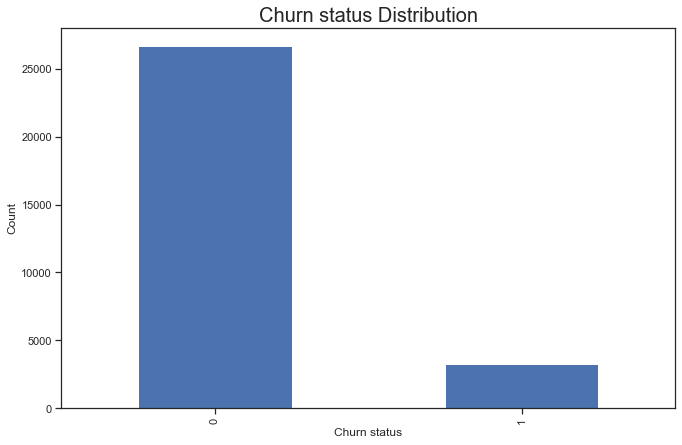

In [29]:
#Plot de gráfico de colunas para a distribuição de 'churn_flag'
plt.figure(figsize=(11,7))#Tamanho da figura
df['churn_flag'].value_counts().plot(kind = 'bar')#comando para plotar os valores da feature em formato de barras ('bar')
plt.ylabel('Count')#Título do eixo Y
plt.xlabel('Churn status') #Título do eixo X
plt.title('Churn status Distribution',fontsize=20) #Título do gráfico e tamanho da fonte.

## número de celular

In [30]:
df['mobile_number'].value_counts().sort_values(ascending = False).head()

7000883200    1
7000066065    1
7000688705    1
7001669696    1
7001405503    1
Name: mobile_number, dtype: int64

A coluna do dataframe mobile_number é uma coluna única e invariável. Posso retirá-la do dataframe porque não vale a pena mantê-la já que ela não agrega nenhum valor à esta análise.

## arpu (receita média por usuário)

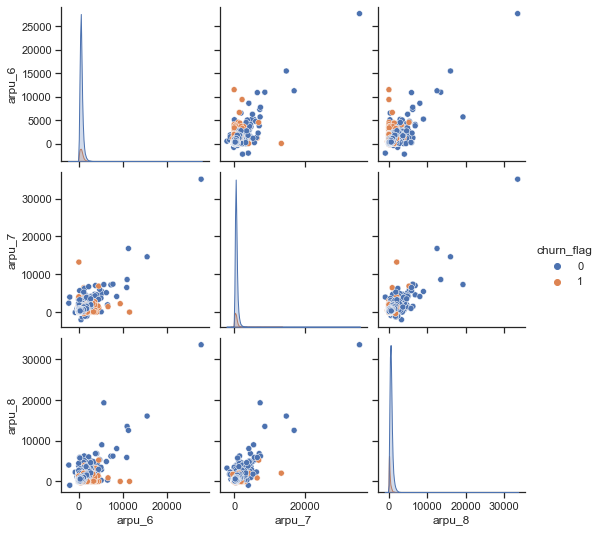

In [31]:
#Visualizar os pares de dados no dataset. hue é a nossa variável target, no caso queremos medir rotatividade (ou 0 ou 1)
sns.pairplot(data=df[['arpu_6','arpu_7','arpu_8','churn_flag']],hue='churn_flag')

<AxesSubplot:xlabel='churn_flag', ylabel='arpu_6'>

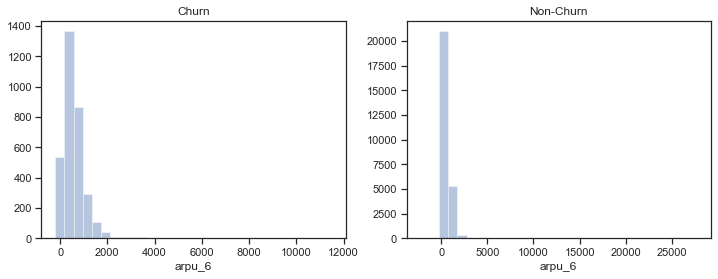

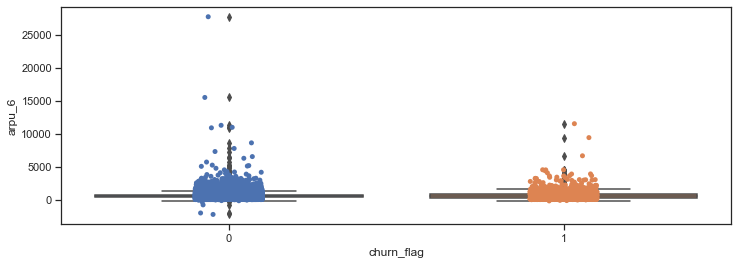

In [32]:
#Histograma de Rotatividade e Permanência baseada na receita média por usuário do mês 6
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].arpu_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].arpu_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='arpu_6', data=df)
sns.stripplot(x='churn_flag', y='arpu_6', data=df, jitter=True, edgecolor="gray")

## onnet_mou (Na rede / uso dentro da mesma rede)

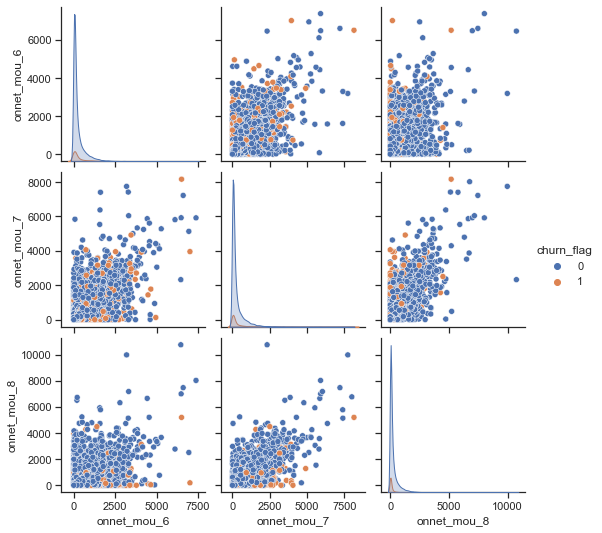

In [33]:
sns.pairplot(data=df[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn_flag']],hue='churn_flag')

<AxesSubplot:xlabel='churn_flag', ylabel='onnet_mou_6'>

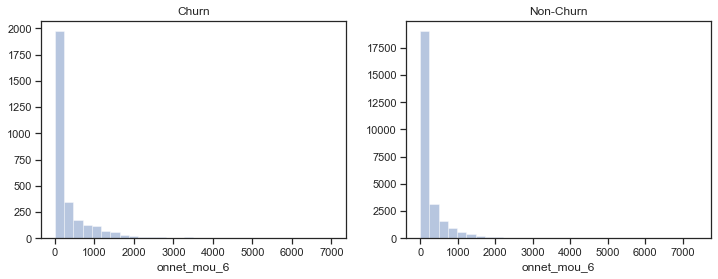

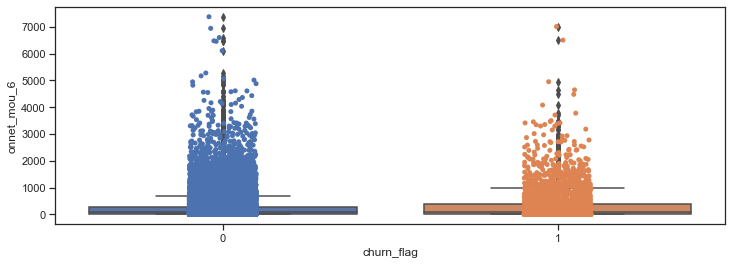

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].onnet_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].onnet_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='onnet_mou_6', data=df)
sns.stripplot(x='churn_flag', y='onnet_mou_6', data=df, jitter=True, edgecolor="gray")

## Offnet_mou (Chamadas fora da rede da operadora)

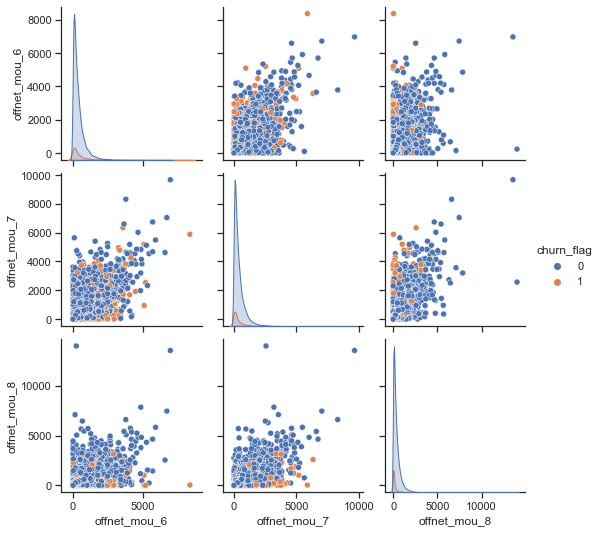

In [35]:
sns.pairplot(data=df[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn_flag']],hue='churn_flag')

<AxesSubplot:xlabel='churn_flag', ylabel='offnet_mou_6'>

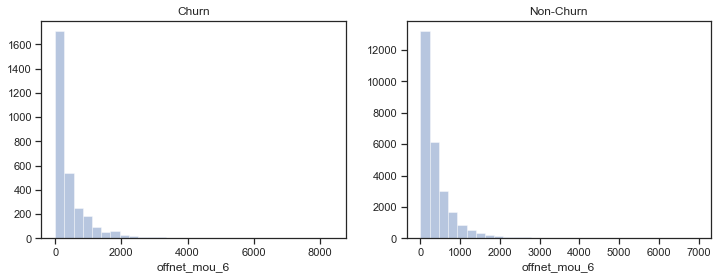

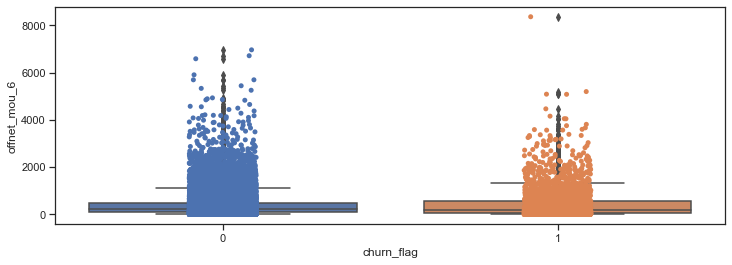

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].offnet_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].offnet_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='offnet_mou_6', data=df)
sns.stripplot(x='churn_flag', y='offnet_mou_6', data=df, jitter=True, edgecolor="gray")


## roam_ic_mou (Cliente em zona roaming)

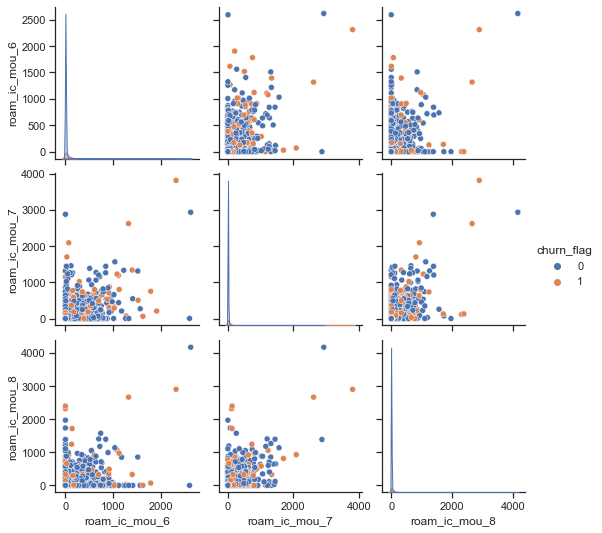

In [37]:
sns.pairplot(data=df[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churn_flag']],hue='churn_flag')

<AxesSubplot:xlabel='churn_flag', ylabel='roam_ic_mou_6'>

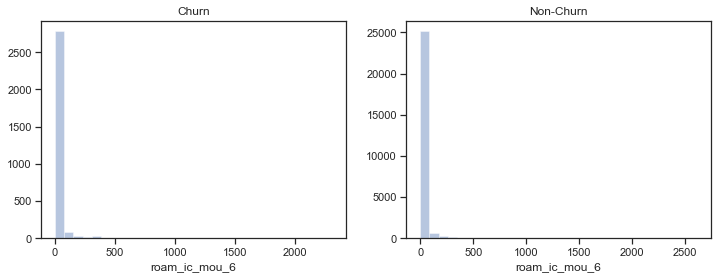

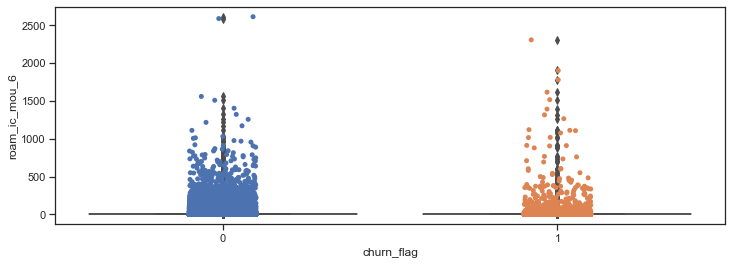

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].roam_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].roam_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='roam_ic_mou_6', data=df)
sns.stripplot(x='churn_flag', y='roam_ic_mou_6', data=df, jitter=True, edgecolor="gray")

## loc_og_mou (dentro do círculo chamadas de saída)

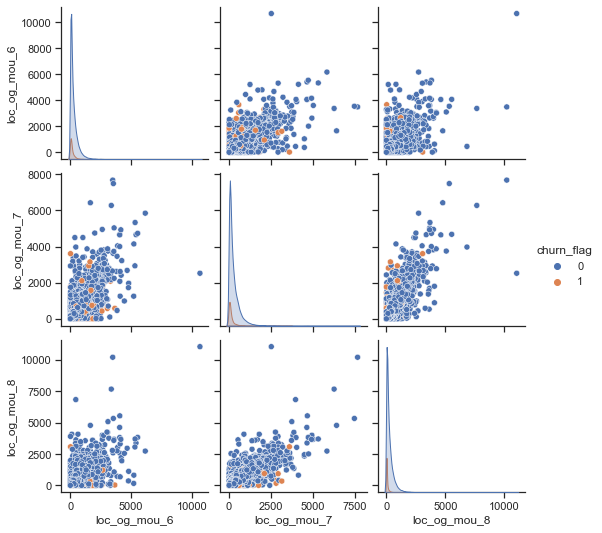

In [39]:
sns.pairplot(data=df[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn_flag']],hue='churn_flag')

<AxesSubplot:xlabel='churn_flag', ylabel='loc_og_mou_6'>

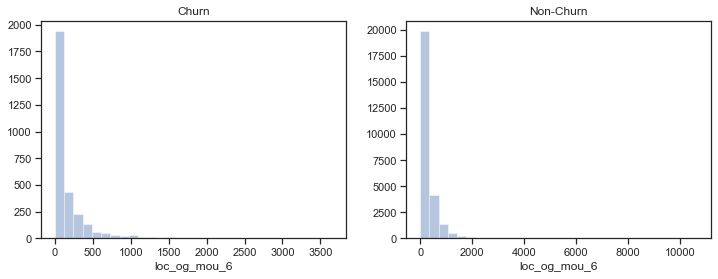

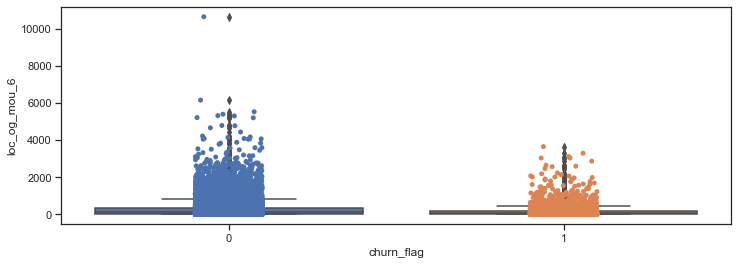

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].loc_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].loc_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='loc_og_mou_6', data=df)
sns.stripplot(x='churn_flag', y='loc_og_mou_6', data=df, jitter=True, edgecolor="gray")

## std_og_mou (Círculo de chamadas recebidas de fora da zona/zona de chamadas)

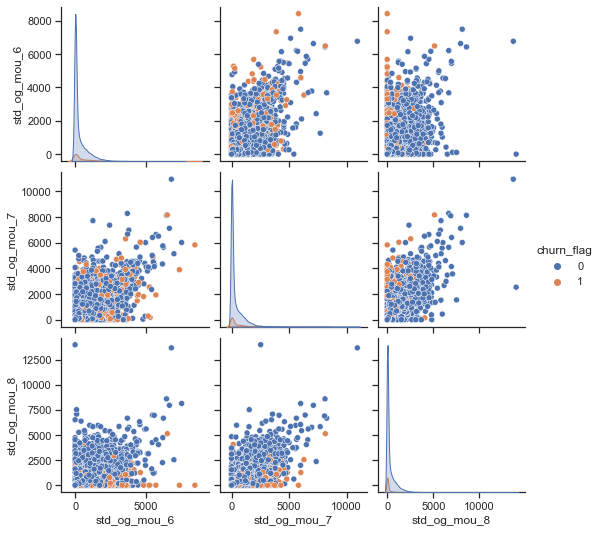

In [41]:
sns.pairplot(data=df[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn_flag']],hue='churn_flag')

<AxesSubplot:xlabel='churn_flag', ylabel='std_og_mou_6'>

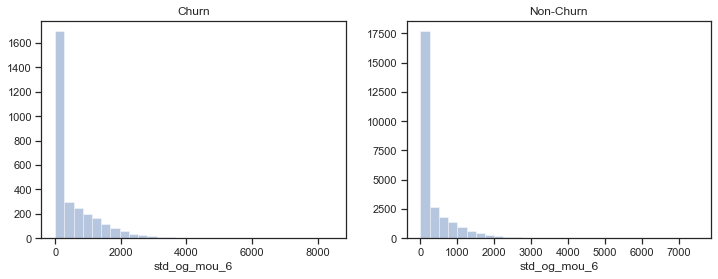

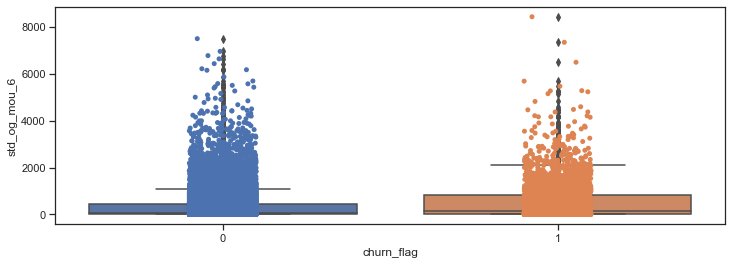

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].std_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].std_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='std_og_mou_6', data=df)
sns.stripplot(x='churn_flag', y='std_og_mou_6', data=df, jitter=True, edgecolor="gray")

## isd_og (Chamada internacional)

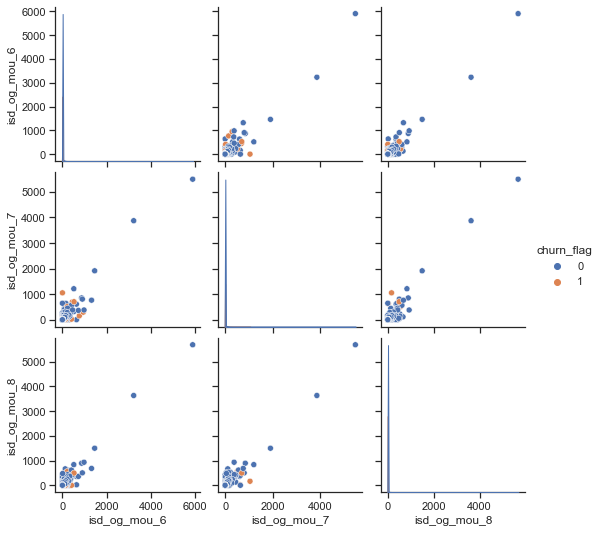

In [43]:
sns.pairplot(data=df[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','churn_flag']],hue='churn_flag')

<AxesSubplot:xlabel='churn_flag', ylabel='isd_og_mou_6'>

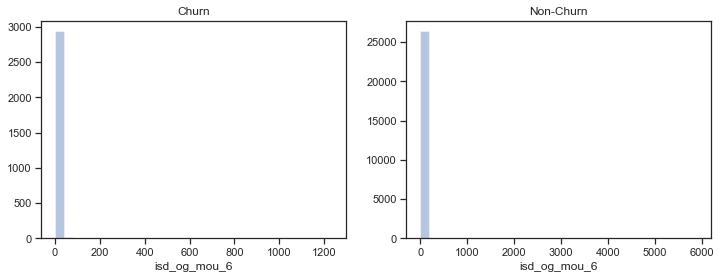

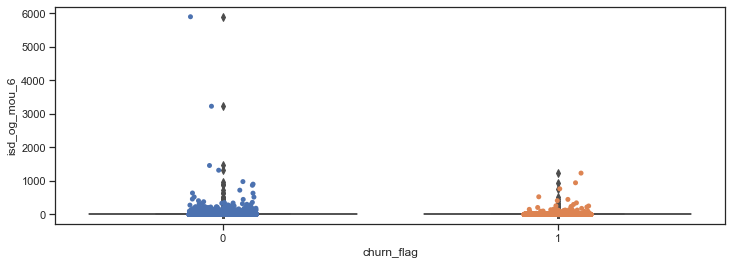

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].isd_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].isd_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='isd_og_mou_6', data=df)
sns.stripplot(x='churn_flag', y='isd_og_mou_6', data=df, jitter=True, edgecolor="gray")

## total_og_ (Chamadas efetuadas pelo cliente, total)

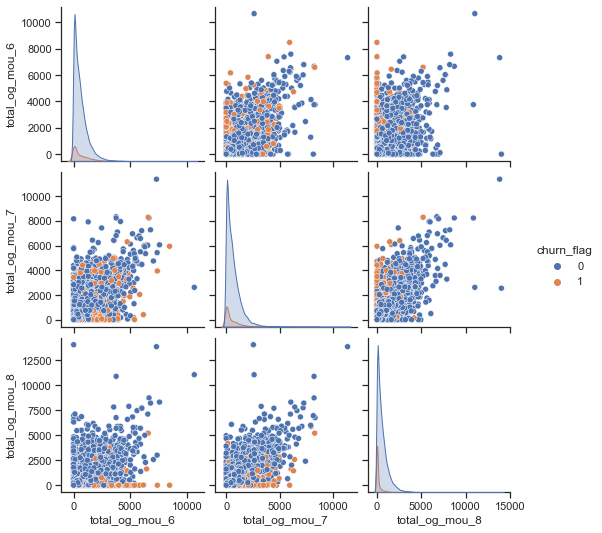

In [45]:
sns.pairplot(data=df[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn_flag']],hue='churn_flag')

<AxesSubplot:xlabel='churn_flag', ylabel='total_og_mou_6'>

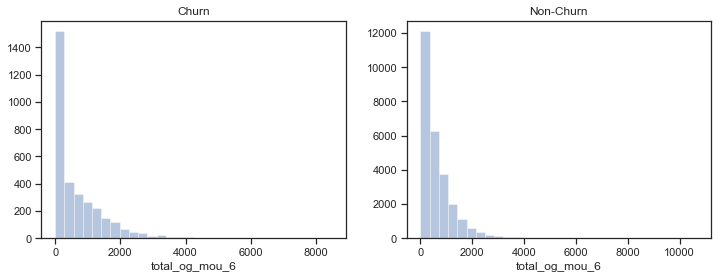

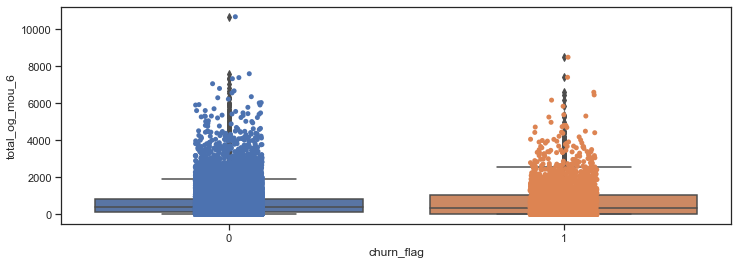

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].total_og_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].total_og_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='total_og_mou_6', data=df)
sns.stripplot(x='churn_flag', y='total_og_mou_6', data=df, jitter=True, edgecolor="gray")

## loc_ic_ (chamadas locais recebidas)

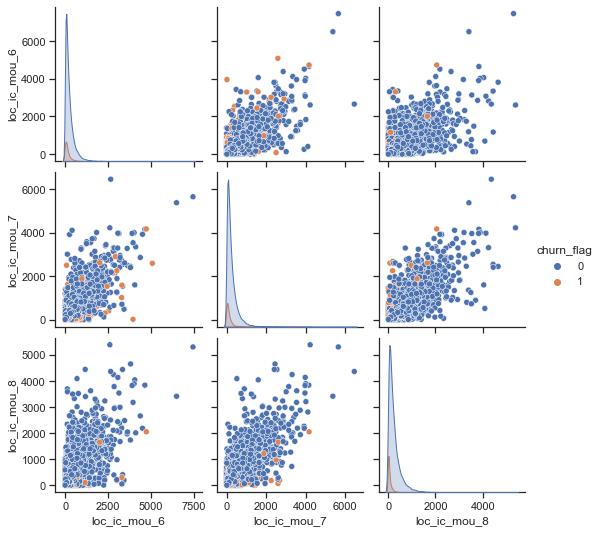

In [47]:
sns.pairplot(data=df[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churn_flag']],hue='churn_flag')

<AxesSubplot:xlabel='churn_flag', ylabel='loc_ic_mou_6'>

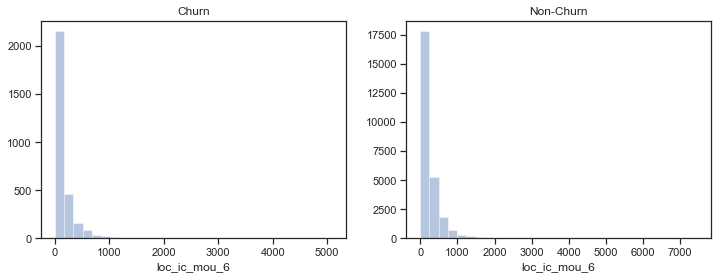

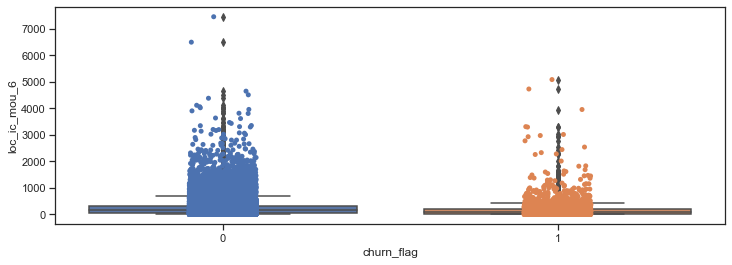

In [48]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].loc_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].loc_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='loc_ic_mou_6', data=df)
sns.stripplot(x='churn_flag', y='loc_ic_mou_6', data=df, jitter=True, edgecolor="gray")

## std_ic_ (chamadas recebidas do círculo externo)

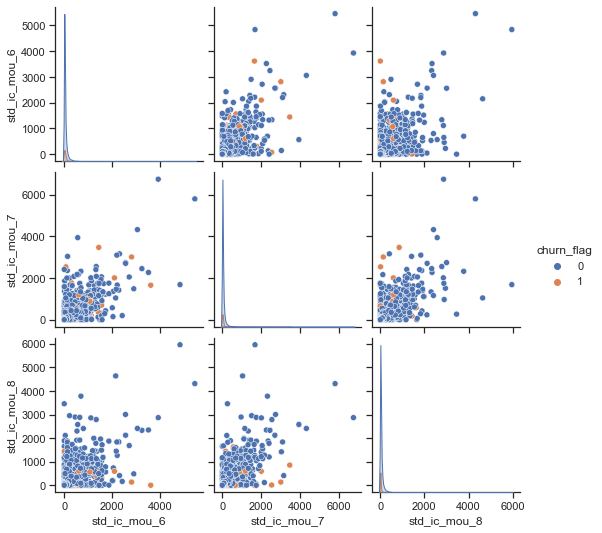

In [49]:
sns.pairplot(data=df[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churn_flag']],hue='churn_flag')

<AxesSubplot:xlabel='churn_flag', ylabel='std_ic_mou_6'>

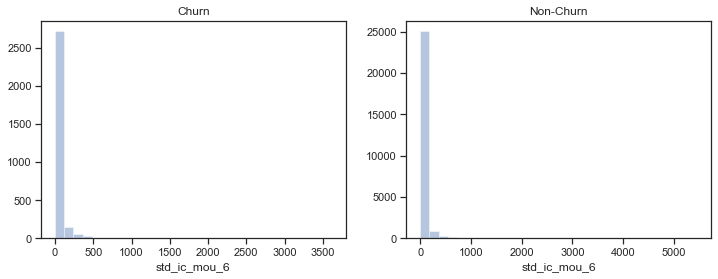

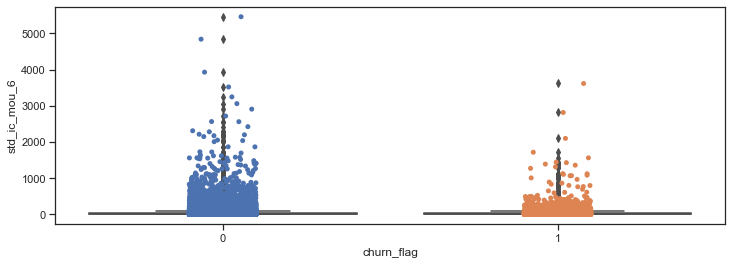

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].std_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].std_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='std_ic_mou_6', data=df)
sns.stripplot(x='churn_flag', y='std_ic_mou_6', data=df, jitter=True, edgecolor="gray")

## total_ic_ (todas as chamadas recebidas por pessoa)

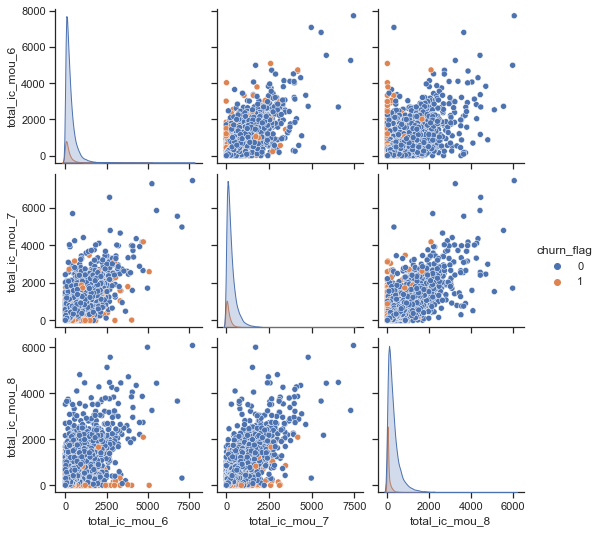

In [51]:
sns.pairplot(data=df[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn_flag']],hue='churn_flag')

<AxesSubplot:xlabel='churn_flag', ylabel='total_ic_mou_6'>

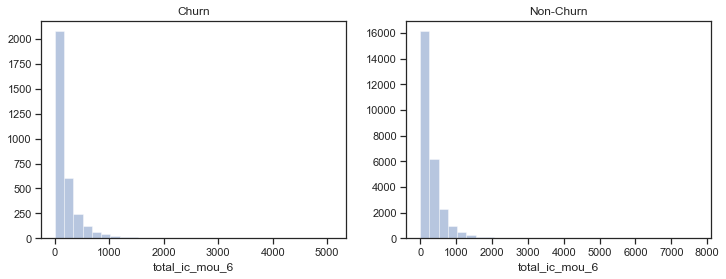

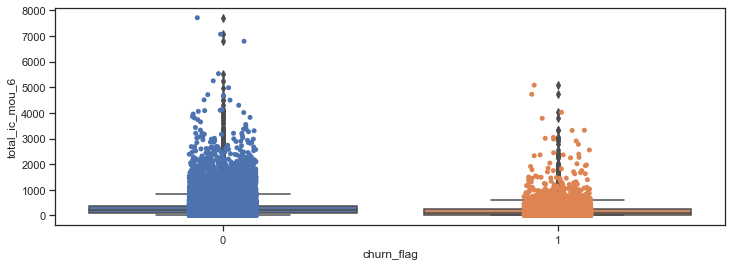

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].total_ic_mou_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].total_ic_mou_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='total_ic_mou_6', data=df)
sns.stripplot(x='churn_flag', y='total_ic_mou_6', data=df, jitter=True, edgecolor="gray")

## total_rech_num_ 
#### (Número de vezes em que o assinante efetuou a recarga do celular)

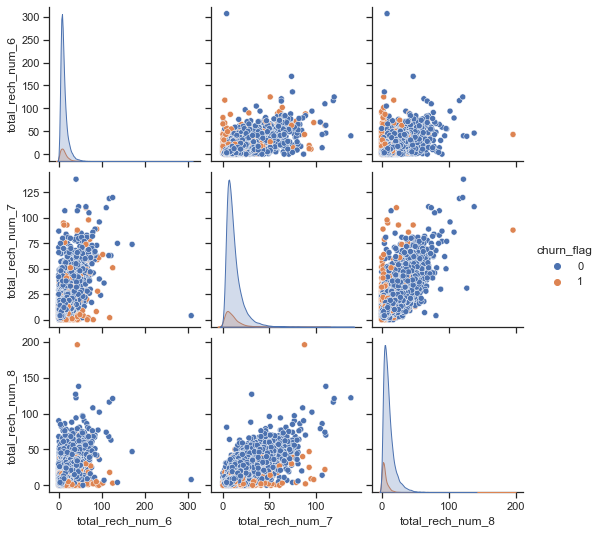

In [53]:
sns.pairplot(data=df[['total_rech_num_6','total_rech_num_7','total_rech_num_8','churn_flag']],hue='churn_flag')

<AxesSubplot:xlabel='churn_flag', ylabel='total_rech_num_6'>

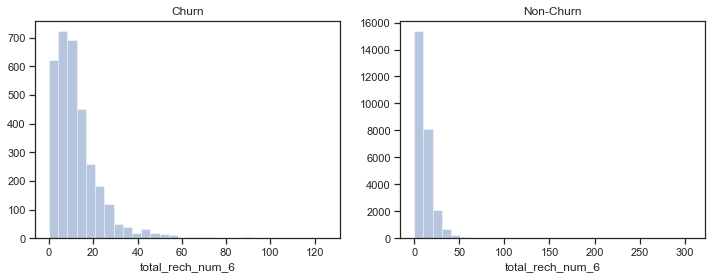

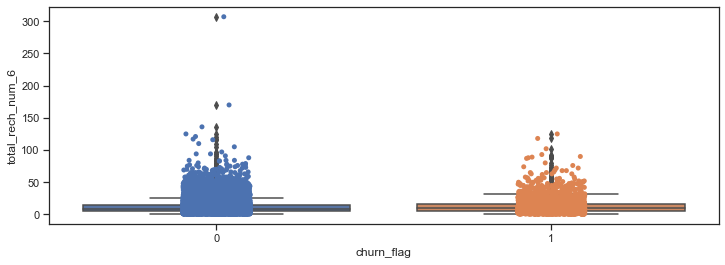

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].total_rech_num_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].total_rech_num_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='total_rech_num_6', data=df)
sns.stripplot(x='churn_flag', y='total_rech_num_6', data=df, jitter=True, edgecolor="gray")

## total_rech_amt_
#### Valor (monetário) total da(s) recarga(s) efetuadas em um período.

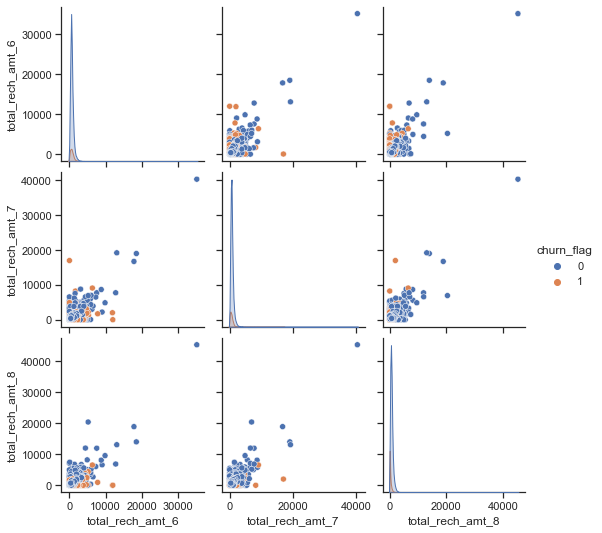

In [55]:
sns.pairplot(data=df[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','churn_flag']],hue='churn_flag')

<AxesSubplot:xlabel='churn_flag', ylabel='total_rech_amt_6'>

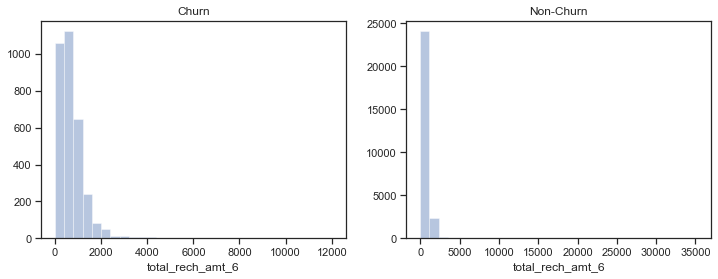

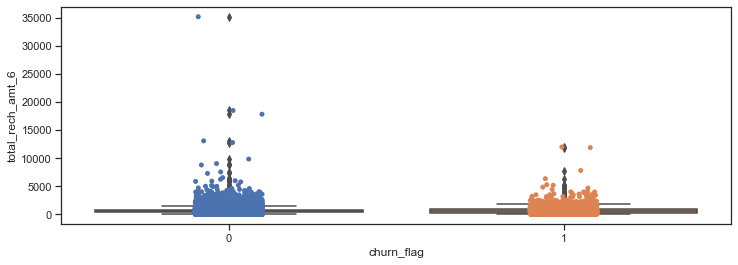

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].total_rech_amt_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].total_rech_amt_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='total_rech_amt_6', data=df)
sns.stripplot(x='churn_flag', y='total_rech_amt_6', data=df, jitter=True, edgecolor="gray")

## total_rech_data_
#### Número total de vezes que os dados móveis foram recarregados.

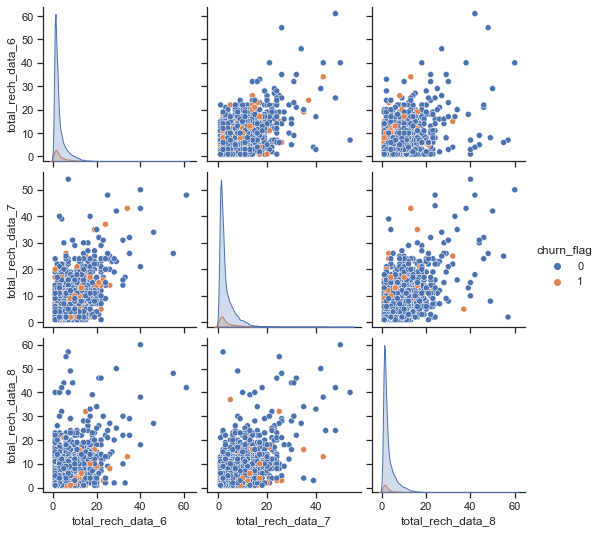

In [57]:
sns.pairplot(data=df[['total_rech_data_6','total_rech_data_7','total_rech_data_8','churn_flag']],hue='churn_flag')

<AxesSubplot:xlabel='churn_flag', ylabel='total_rech_data_6'>

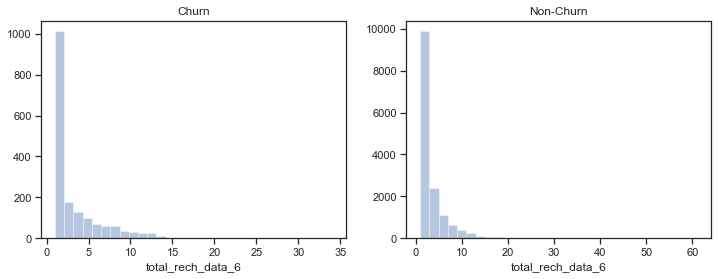

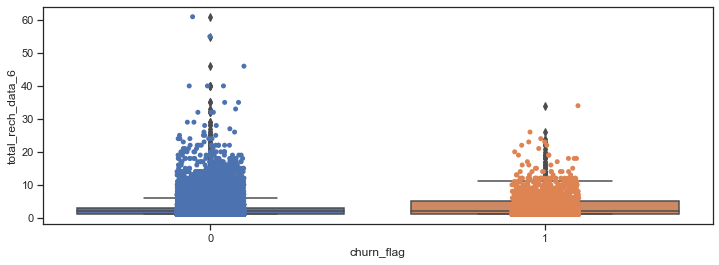

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].total_rech_data_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].total_rech_data_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='total_rech_data_6', data=df)
sns.stripplot(x='churn_flag', y='total_rech_data_6', data=df, jitter=True, edgecolor="gray")

## vol_2g_mb_
#### Uso de internet 2G em MB.

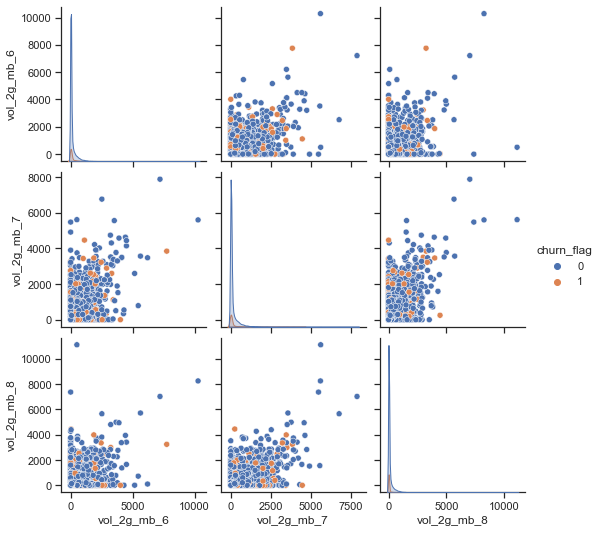

In [59]:
sns.pairplot(data=df[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','churn_flag']],hue='churn_flag')

<AxesSubplot:xlabel='churn_flag', ylabel='vol_2g_mb_6'>

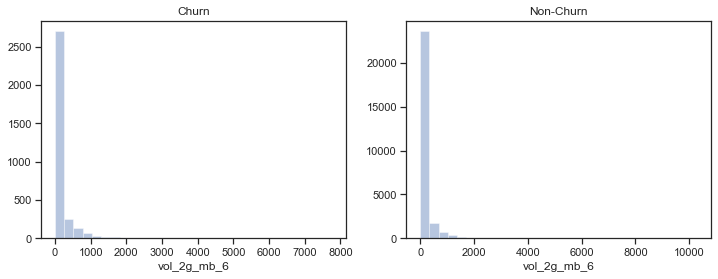

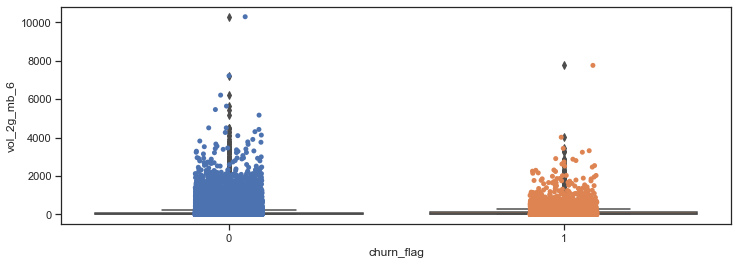

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].vol_2g_mb_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].vol_2g_mb_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='vol_2g_mb_6', data=df)
sns.stripplot(x='churn_flag', y='vol_2g_mb_6', data=df, jitter=True, edgecolor="gray")

## vol_3g_mb_
#### Uso de internet 3G em MB

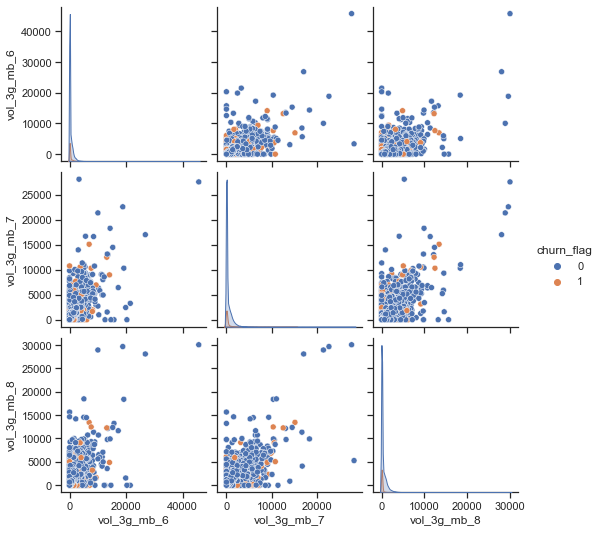

In [61]:
sns.pairplot(data=df[['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','churn_flag']],hue='churn_flag')

<AxesSubplot:xlabel='churn_flag', ylabel='vol_3g_mb_6'>

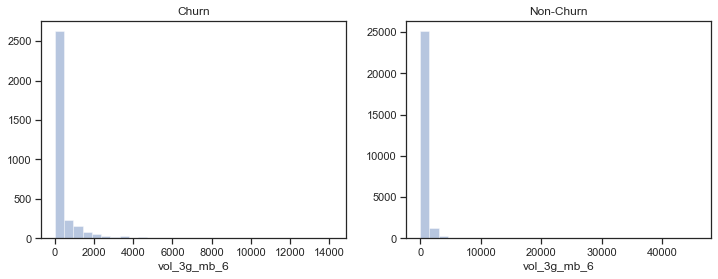

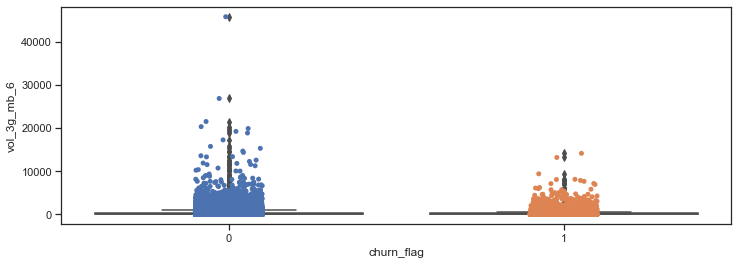

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].vol_3g_mb_6, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].vol_3g_mb_6, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='vol_3g_mb_6', data=df)
sns.stripplot(x='churn_flag', y='vol_3g_mb_6', data=df, jitter=True, edgecolor="gray")

## vbc_3g_
#### Custo baseado em volume - pago de acordo com o uso.

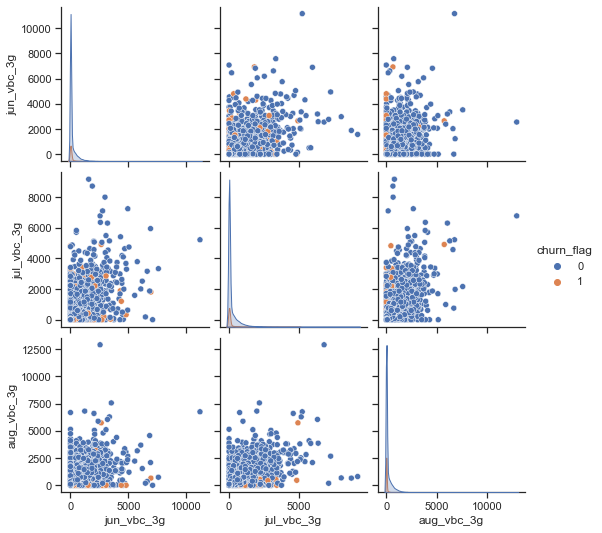

In [63]:
sns.pairplot(data=df[['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','churn_flag']],hue='churn_flag')

<AxesSubplot:xlabel='churn_flag', ylabel='jun_vbc_3g'>

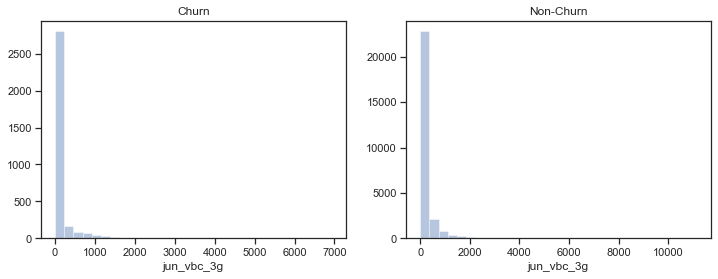

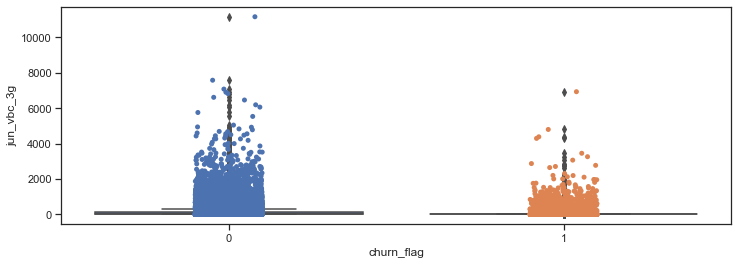

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['churn_flag']==1].jun_vbc_3g, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax = sns.distplot(df[df['churn_flag']==0].jun_vbc_3g, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
sns.boxplot(x='churn_flag', y='jun_vbc_3g', data=df)
sns.stripplot(x='churn_flag', y='jun_vbc_3g', data=df, jitter=True, edgecolor="gray")

Podemos ver poucas observações entre as features, que têm um comportamento diferente. Podemos considerá-los como outliers? Quase 2% a 10% são marcados como outliers com base no recurso. Se verificarmos o padrão entre Rotatividade vs Cliente-permanece, é o mesmo em todos eles e também em todas as features. Portanto, não podemos excluí-los do ponto de vista do modelo.

## Features resultantes.

Vou começar formatando primeiro as features de datas.

In [65]:
df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'])
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'])
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'])

df['date_of_last_rech_data_6'] = pd.to_datetime(df['date_of_last_rech_data_6'])
df['date_of_last_rech_data_7'] = pd.to_datetime(df['date_of_last_rech_data_7'])
df['date_of_last_rech_data_8'] = pd.to_datetime(df['date_of_last_rech_data_8'])

df['mobile_number'] = df['mobile_number'].astype(str)

Criar novas features a partir das colunas de data <br>
Pode nos ajudar a identificar se um determinado dia em um mês ou uma semana está causando algum problema.

In [66]:
# Criando novas features a partir das colunas de data.
df['date_of_last_rech_day_6'] = df['date_of_last_rech_6'].dt.day
df['date_of_last_rech_dayofwk_6'] = df['date_of_last_rech_6'].dt.dayofweek.astype(str)

df['date_of_last_rech_day_7'] = df['date_of_last_rech_7'].dt.day
df['date_of_last_rech_dayofwk_7'] = df['date_of_last_rech_7'].dt.dayofweek.astype(str)

df['date_of_last_rech_day_8'] = df['date_of_last_rech_8'].dt.day
df['date_of_last_rech_dayofwk_8'] = df['date_of_last_rech_8'].dt.dayofweek.astype(str)

df['date_of_last_rech_data_day_6'] = df['date_of_last_rech_data_6'].dt.day
df['date_of_last_rech_data_dayofwk_6'] = df['date_of_last_rech_data_6'].dt.dayofweek.astype(str)

df['date_of_last_rech_data_day_7'] = df['date_of_last_rech_data_7'].dt.day
df['date_of_last_rech_data_dayofwk_7'] = df['date_of_last_rech_data_7'].dt.dayofweek.astype(str)

df['date_of_last_rech_data_day_8'] = df['date_of_last_rech_data_8'].dt.day
df['date_of_last_rech_data_dayofwk_8'] = df['date_of_last_rech_data_8'].dt.dayofweek.astype(str)


In [67]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 176 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   mobile_number                     29953 non-null  object        
 1   arpu_6                            29953 non-null  float64       
 2   arpu_7                            29953 non-null  float64       
 3   arpu_8                            29953 non-null  float64       
 4   onnet_mou_6                       29411 non-null  float64       
 5   onnet_mou_7                       29417 non-null  float64       
 6   onnet_mou_8                       28781 non-null  float64       
 7   offnet_mou_6                      29411 non-null  float64       
 8   offnet_mou_7                      29417 non-null  float64       
 9   offnet_mou_8                      28781 non-null  float64       
 10  roam_ic_mou_6                     29411 non-n

In [68]:
pd.options.display.float_format = '{:.2f}'.format #dados tipo float com duas casas após a vírgula.
df.describe()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
count 29953.00 29953.00 29953.00     29411.00     29417.00     28781.00   
mean    558.82   561.16   508.89       265.71       272.94       243.89   
std     460.87   480.03   502.14       462.69       483.28       465.51   
min   -2258.71 -2014.05  -945.81         0.00         0.00         0.00   
25%     310.14   310.07   231.62        19.25        18.18        14.28   
50%     482.35   481.50   427.60        88.14        86.89        72.99   
75%     700.24   698.83   661.75       297.49       298.38       255.31   
max   27731.09 35145.83 33543.62      7376.71      8157.78     10752.56   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
count      29411.00      29417.00      28781.00       29411.00       29417.00   
mean         380.69        385.12        348.77          16.42          12.88   
std          484.44        501.02        486.84          77.01          76.50   
min            0.00          0.00          0.00           0.00           0.00   
25%           78.55         76.18         58.76           0.00           0.00   
50%          229.63        227.13        197.69           0.00           0.00   
75%          494.75        500.48        455.44           0.00           0.00   
max         8362.36       9667.13      14007.34        2613.31        3813.29   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
count       28781.00       29411.00       29417.00       28781.00   
mean           13.02          27.09          20.52          20.70   
std            75.63         117.28          96.97         106.83   
min             0.00           0.00           0.00           0.00   
25%             0.00           0.00           0.00           0.00   
50%             0.00           0.00           0.00           0.00   
75%             0.00           0.00           0.00           0.00   
max          4169.81        3775.11        2812.04        5337.04   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
count          29411.00          29417.00          28781.00          29411.00   
mean              86.13             87.33             81.34            166.32   
std              230.77            242.60            231.57            251.52   
min                0.00              0.00              0.00              0.00   
25%                5.03              5.29              3.84             21.13   
50%               25.59             25.79             23.26             80.34   
75%               79.87             80.44             76.11            212.49   
max             6431.33           7400.66          10752.56           4729.74   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
count          29417.00          28781.00          29411.00          29417.00   
mean             166.06            157.99              6.47              6.54   
std              242.86            236.40             22.33             22.14   
min                0.00              0.00              0.00              0.00   
25%               22.94             17.58              0.00              0.00   
50%               81.74             74.66              0.11              0.21   
75%              211.81            205.88              4.38              4.54   
max             4557.14           4961.33           1466.03           1196.43   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
count          28781.00          29411.00          29417.00          28781.00   
mean               6.13              1.61              1.92              1.77   
std               19.87              6.36              9.22              7.28   
min                0.00              0.00              0.00              0.00   
25%                0.00              0.00              0.00              0.00   
50%                0.00           

Checando a correlação entre as features. 

In [69]:
joincorr= df.corr()
df_corr = joincorr.stack().reset_index().sort_values(by = 0, ascending = False)
df_corr[((df_corr[0] < 1) & (df_corr[0] >= 0.4)) | ((df_corr[0] <= -0.4) & (df_corr[0] > -1))]

level_0                       level_1     0
22441                   sachet_2g_8               count_rech_2g_8  0.99
18067               count_rech_2g_8                   sachet_2g_8  0.99
17903               count_rech_2g_7                   sachet_2g_7  0.99
22277                   sachet_2g_7               count_rech_2g_7  0.99
22113                   sachet_2g_6               count_rech_2g_6  0.98
17739               count_rech_2g_6                   sachet_2g_6  0.98
25254                    amt_data_7             total_data_rech_7  0.97
24930             total_data_rech_7                    amt_data_7  0.97
25090                    amt_data_6             total_data_rech_6  0.97
24766             total_data_rech_6                    amt_data_6  0.97
15487              total_rech_amt_8                        arpu_8  0.96
421                          arpu_8              total_rech_amt_8  0.96
6890                   isd_og_mou_6                  isd_og_mou_8  0.95
7214                   isd_og_mou_8                  isd_og_mou_6  0.95
7215                   isd_og_mou_8                  isd_og_mou_7  0.95
7053                   isd_og_mou_7                  isd_og_mou_8  0.95
15159              total_rech_amt_6                        arpu_6  0.95
93                           arpu_6              total_rech_amt_6  0.95
15323              total_rech_amt_7                        arpu_7  0.94
257                          arpu_7              total_rech_amt_7  0.94
6889                   isd_og_mou_6                  isd_og_mou_7  0.93
7051                   isd_og_mou_7                  isd_og_mou_6  0.93
20661                     arpu_2g_6                     arpu_3g_6  0.93
20175                     arpu_3g_6                     arpu_2g_6  0.93
20989                     arpu_2g_8                     arpu_3g_8  0.93
20503                     arpu_3g_8                     arpu_2g_8  0.93
20339                     arpu_3g_7                     arpu_2g_7  0.93
20825                     arpu_2g_7                     arpu_3g_7  0.93
10347                  loc_ic_mou_6                total_ic_mou_6  0.90
12777                total_ic_mou_6                  loc_ic_mou_6  0.90
22107                   sachet_2g_6             total_rech_data_6  0.90
16761             total_rech_data_6                   sachet_2g_6  0.90
10675                  loc_ic_mou_8                total_ic_mou_8  0.89
13105                total_ic_mou_8                  loc_ic_mou_8  0.89
16925             total_rech_data_7                   sachet_2g_7  0.89
22271                   sachet_2g_7             total_rech_data_7  0.89
17706               count_rech_2g_6             total_rech_data_6  0.89
16734             total_rech_data_6               count_rech_2g_6  0.89
17870               count_rech_2g_7             total_rech_data_7  0.89
16898             total_rech_data_7               count_rech_2g_7  0.89
17089             total_rech_data_8                   sachet_2g_8  0.89
22435                   sachet_2g_8             total_rech_data_8  0.89
12941                total_ic_mou_7                  loc_ic_mou_7  0.88
10511                  loc_ic_mou_7                total_ic_mou_7  0.88
18034               count_rech_2g_8             total_rech_data_8  0.88
17062             total_rech_data_8               count_rech_2g_8  0.88
23422                   sachet_3g_8               count_rech_3g_8  0.88
18562               count_rech_3g_8                   sachet_3g_8  0.88
847                     onnet_mou_8              std_og_t2t_mou_8  0.86
5221               std_og_t2t_mou_8                   onnet_mou_8  0.86
683                     onnet_mou_7              std_og_t2t_mou_7  0.86
5057               std_og_t2t_mou_7                   onnet_mou_7  0.86
519                     onnet_mou_6              std_og_t2t_mou_6  0.86
4893               std_og_t2t_mou_6                   onnet_mou_6  0.86
23258                   sachet_3g_7               count_rech_3g_7  0

Há alta correlação entre as mesmas features com a diferença do mês. <br> Como podemos cuidar disso? <br> Vou eliminar e criar novas features baseada nos dados de um mês em que o cliente está na fase 1 (fase boa, satisfação) e compará-las com a fase em que será necessária a tomada de ação para poder manter o cliente.<br>

In [70]:
df['AVG_arpu_6_7'] = df[['arpu_6','arpu_7']].mean(axis=1)
df['is_arpu_flag'] = np.where((df['arpu_8'] > df['AVG_arpu_6_7']), 0, 1)

df['AVG_onnet_mou_6_7'] = df[['onnet_mou_6','onnet_mou_7']].mean(axis=1)
df['is_onnet_mou_flag'] = np.where((df['onnet_mou_8'] > df['AVG_onnet_mou_6_7']), 0, 1)

df['AVG_offnet_mou_6_7'] = df[['offnet_mou_6','offnet_mou_7']].mean(axis=1)
df['is_offnet_mou_flag'] = np.where((df['offnet_mou_8'] > df['AVG_offnet_mou_6_7']), 0, 1)

df['AVG_roam_ic_mou_6_7'] = df[['roam_ic_mou_6','roam_ic_mou_7']].mean(axis=1)
df['is_roam_ic_mou_flag'] = np.where((df['roam_ic_mou_8'] > df['AVG_roam_ic_mou_6_7']), 0, 1)

df['AVG_roam_og_mou_6_7'] = df[['roam_og_mou_6','roam_og_mou_7']].mean(axis=1)
df['is_roam_og_mou_flag'] = np.where((df['roam_og_mou_8'] > df['AVG_roam_og_mou_6_7']), 0, 1)

df['AVG_loc_og_t2t_mou_6_7'] = df[['loc_og_t2t_mou_6','loc_og_t2t_mou_7']].mean(axis=1)
df['is_loc_og_t2t_mou_flag'] = np.where((df['loc_og_t2t_mou_8'] > df['AVG_loc_og_t2t_mou_6_7']), 0, 1)

df['AVG_loc_og_t2m_mou_6_7'] = df[['loc_og_t2m_mou_6','loc_og_t2m_mou_7']].mean(axis=1)
df['is_loc_og_t2m_mou_flag'] = np.where((df['loc_og_t2m_mou_8'] > df['AVG_loc_og_t2m_mou_6_7']), 0, 1)

df['AVG_loc_og_t2f_mou_6_7'] = df[['loc_og_t2f_mou_6','loc_og_t2f_mou_7']].mean(axis=1)
df['is_loc_og_t2f_mou_flag'] = np.where((df['loc_og_t2f_mou_8'] > df['AVG_loc_og_t2f_mou_6_7']), 0, 1)

df['AVG_loc_og_t2c_mou_6_7'] = df[['loc_og_t2c_mou_6','loc_og_t2c_mou_7']].mean(axis=1)
df['is_loc_og_t2c_mou_flag'] = np.where((df['loc_og_t2c_mou_8'] > df['AVG_loc_og_t2c_mou_6_7']), 0, 1)

df['AVG_std_og_t2t_mou_6_7'] = df[['std_og_t2t_mou_6','std_og_t2t_mou_7']].mean(axis=1)
df['is_std_og_t2t_mou_flag'] = np.where((df['std_og_t2t_mou_8'] > df['AVG_std_og_t2t_mou_6_7']), 0, 1)

df['AVG_std_og_t2m_mou_6_7'] = df[['std_og_t2m_mou_6','std_og_t2m_mou_7']].mean(axis=1)
df['is_std_og_t2m_mou_flag'] = np.where((df['std_og_t2m_mou_8'] > df['AVG_std_og_t2m_mou_6_7']), 0, 1)

df['AVG_std_og_t2f_mou_6_7'] = df[['std_og_t2f_mou_6','std_og_t2f_mou_7']].mean(axis=1)
df['is_std_og_t2f_mou_flag'] = np.where((df['std_og_t2f_mou_8'] > df['AVG_std_og_t2f_mou_6_7']), 0, 1)

df['AVG_isd_og_mou_6_7'] = df[['isd_og_mou_6','isd_og_mou_7']].mean(axis=1)
df['is_isd_og_mou_flag'] = np.where((df['isd_og_mou_8'] > df['AVG_isd_og_mou_6_7']), 0, 1)

df['AVG_spl_og_mou_6_7'] = df[['spl_og_mou_6','spl_og_mou_7']].mean(axis=1)
df['is_spl_og_mou_flag'] = np.where((df['spl_og_mou_8'] > df['AVG_spl_og_mou_6_7']), 0, 1)

df['AVG_og_others_6_7'] = df[['og_others_6','og_others_7']].mean(axis=1)
df['is_og_others_flag'] = np.where((df['og_others_8'] > df['AVG_og_others_6_7']), 0, 1)


df['AVG_loc_ic_t2t_mou_6_7'] = df[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7']].mean(axis=1)
df['is_loc_ic_t2t_mou_flag'] = np.where((df['loc_ic_t2t_mou_8'] > df['AVG_loc_ic_t2t_mou_6_7']), 0, 1)

df['AVG_loc_ic_t2m_mou_6_7'] = df[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']].mean(axis=1)
df['is_loc_ic_t2m_mou_flag'] = np.where((df['loc_ic_t2m_mou_8'] > df['AVG_loc_ic_t2m_mou_6_7']), 0, 1)

df['AVG_loc_ic_t2f_mou_6_7'] = df[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7']].mean(axis=1)
df['is_loc_ic_t2f_mou_flag'] = np.where((df['loc_ic_t2f_mou_8'] > df['AVG_loc_ic_t2f_mou_6_7']), 0, 1)

df['AVG_std_ic_t2t_mou_6_7'] = df[['std_ic_t2t_mou_6','std_ic_t2t_mou_7']].mean(axis=1)
df['is_std_ic_t2t_mou_flag'] = np.where((df['std_ic_t2t_mou_8'] > df['AVG_std_ic_t2t_mou_6_7']), 0, 1)

df['AVG_std_ic_t2m_mou_6_7'] = df[['std_ic_t2m_mou_6','std_ic_t2m_mou_7']].mean(axis=1)
df['is_std_ic_t2m_mou_flag'] = np.where((df['std_ic_t2m_mou_8'] > df['AVG_std_ic_t2m_mou_6_7']), 0, 1)

df['AVG_std_ic_t2f_mou_6_7'] = df[['std_ic_t2f_mou_6','std_ic_t2f_mou_7']].mean(axis=1)
df['is_std_ic_t2f_mou_flag'] = np.where((df['std_ic_t2f_mou_8'] > df['AVG_std_ic_t2f_mou_6_7']), 0, 1)

df['AVG_spl_ic_mou_6_7'] = df[['spl_ic_mou_6','spl_ic_mou_7']].mean(axis=1)
df['is_spl_ic_mou_flag'] = np.where((df['spl_ic_mou_8'] > df['AVG_spl_ic_mou_6_7']), 0, 1)

df['AVG_isd_ic_mou_6_7'] = df[['isd_ic_mou_6','isd_ic_mou_7']].mean(axis=1)
df['is_isd_ic_mou_flag'] = np.where((df['isd_ic_mou_8'] > df['AVG_isd_ic_mou_6_7']), 0, 1)

df['AVG_ic_others_6_7'] = df[['ic_others_6','ic_others_7']].mean(axis=1)
df['is_ic_others_flag'] = np.where((df['ic_others_8'] > df['AVG_ic_others_6_7']), 0, 1)

df['AVG_total_rech_amt_6_7'] = df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
df['is_total_rech_amt_flag'] = np.where((df['total_rech_amt_8'] > df['AVG_total_rech_amt_6_7']), 0, 1)

df['AVG_vol_2g_mb_6_7'] = df[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)
df['is_vol_2g_mb_flag'] = np.where((df['vol_2g_mb_8'] > df['AVG_vol_2g_mb_6_7']), 0, 1)

df['AVG_vol_3g_mb_6_7'] = df[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)
df['is_vol_3g_mb_flag'] = np.where((df['vol_3g_mb_8'] > df['AVG_vol_3g_mb_6_7']), 0, 1)

df['AVG_arpu_3g_6_7'] = df[['arpu_3g_6','arpu_3g_7']].mean(axis=1)
df['is_arpu_3g_flag'] = np.where((df['arpu_3g_8'] > df['AVG_arpu_3g_6_7']), 0, 1)

df['AVG_arpu_2g_6_7'] = df[['arpu_2g_6','arpu_2g_7']].mean(axis=1)
df['is_arpu_2g_flag'] = np.where((df['arpu_2g_8'] > df['AVG_arpu_2g_6_7']), 0, 1)

df['AVG_vbc_3g_6_7'] = df[['jun_vbc_3g','jul_vbc_3g']].mean(axis=1)
df['is_vbc_3g_flag'] = np.where((df['aug_vbc_3g'] > df['AVG_vbc_3g_6_7']), 0, 1)

df['AVG_loc_og_mou_6_7'] = df[['loc_og_mou_6','loc_og_mou_7']].mean(axis=1)
df['is_loc_og_mou_flag'] = np.where((df['loc_og_mou_8'] > df['AVG_loc_og_mou_6_7']), 0, 1)

df['AVG_std_og_mou_6_7'] = df[['std_og_mou_6','std_og_mou_7']].mean(axis=1)
df['is_std_og_mou_flag'] = np.where((df['std_og_mou_8'] > df['AVG_std_og_mou_6_7']), 0, 1)

df['AVG_total_og_mou_6_7'] = df[['total_og_mou_6','total_og_mou_7']].mean(axis=1)
df['is_total_og_mou_flag'] = np.where((df['total_og_mou_8'] > df['AVG_total_og_mou_6_7']), 0, 1)

df['AVG_loc_ic_mou_6_7'] = df[['loc_ic_mou_6','loc_ic_mou_7']].mean(axis=1)
df['is_loc_ic_mou_flag'] = np.where((df['loc_ic_mou_8'] > df['AVG_loc_ic_mou_6_7']), 0, 1)

df['AVG_std_ic_mou_6_7'] = df[['std_ic_mou_6','std_ic_mou_7']].mean(axis=1)
df['is_std_ic_mou_flag'] = np.where((df['std_ic_mou_8'] > df['AVG_std_ic_mou_6_7']), 0, 1)

df['AVG_total_ic_mou_6_7'] = df[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)
df['is_total_ic_mou_flag'] = np.where((df['total_ic_mou_8'] > df['AVG_total_ic_mou_6_7']), 0, 1)

df['AVG_night_pck_user_6_7'] = df[['night_pck_user_6','night_pck_user_7']].mean(axis=1)
df['is_night_pck_user_flag'] = np.where((df['night_pck_user_8'] > df['AVG_night_pck_user_6_7']), 0, 1)

df['AVG_monthly_2g_6_7'] = df[['monthly_2g_6','monthly_2g_7']].mean(axis=1)
df['is_monthly_2g_flag'] = np.where((df['monthly_2g_8'] > df['AVG_monthly_2g_6_7']), 0, 1)

df['AVG_sachet_2g_6_7'] = df[['sachet_2g_6','sachet_2g_7']].mean(axis=1)
df['is_sachet_2g_flag'] = np.where((df['sachet_2g_8'] > df['AVG_sachet_2g_6_7']), 0, 1)

df['AVG_monthly_3g_6_7'] = df[['monthly_3g_6','monthly_3g_7']].mean(axis=1)
df['is_monthly_3g_flag'] = np.where((df['monthly_3g_8'] > df['AVG_monthly_3g_6_7']), 0, 1)

df['AVG_sachet_3g_6_7'] = df[['sachet_3g_6','sachet_3g_7']].mean(axis=1)
df['is_sachet_3g_flag'] = np.where((df['sachet_3g_8'] > df['AVG_sachet_3g_6_7']), 0, 1)

df['AVG_fb_user_6_7'] = df[['fb_user_6','fb_user_7']].mean(axis=1)
df['is_fb_user_flag'] = np.where((df['fb_user_8'] > df['AVG_fb_user_6_7']), 0, 1)


Criando features de mudança mês a mês para entender qualquer risco associado

In [71]:
# Criação de novas features mês a mês para entender o risco associado a rotatividade
df['loc_og_t2t_mou_7diff6'] = df['loc_og_t2t_mou_7'] - df['loc_og_t2t_mou_6']
df['loc_og_t2m_mou_7diff6'] = df['loc_og_t2m_mou_7'] - df['loc_og_t2m_mou_6']
df['loc_og_t2f_mou_7diff6'] = df['loc_og_t2f_mou_7'] - df['loc_og_t2f_mou_6']
df['loc_og_t2c_mou_7diff6'] = df['loc_og_t2c_mou_7'] - df['loc_og_t2c_mou_6']
df['loc_og_mou_7diff6'] = df['loc_og_mou_7'] - df['loc_og_mou_6']
df['std_og_t2t_mou_7diff6'] = df['std_og_t2t_mou_7'] - df['std_og_t2t_mou_6']
df['std_og_t2m_mou_7diff6'] = df['std_og_t2m_mou_7'] - df['std_og_t2m_mou_6']
df['std_og_t2f_mou_7diff6'] = df['std_og_t2f_mou_7'] - df['std_og_t2f_mou_6']
df['std_og_mou_7diff6'] = df['std_og_mou_7'] - df['std_og_mou_6']
df['loc_og_mou_7diff6'] = df['loc_og_mou_7'] - df['loc_og_mou_6']
df['std_og_mou_7diff6'] = df['std_og_mou_7'] - df['std_og_mou_6']
df['isd_og_mou_7diff6'] = df['isd_og_mou_7'] - df['isd_og_mou_6']
df['spl_og_mou_7diff6'] = df['spl_og_mou_7'] - df['spl_og_mou_6']
df['og_others_7diff6'] = df['og_others_7'] - df['og_others_6']
df['total_og_mou_7diff6'] = df['total_og_mou_7'] - df['total_og_mou_6']

df['loc_og_t2t_mou_8diff7'] = df['loc_og_t2t_mou_8'] - df['loc_og_t2t_mou_7']
df['loc_og_t2m_mou_8diff7'] = df['loc_og_t2m_mou_8'] - df['loc_og_t2m_mou_7']
df['loc_og_t2f_mou_8diff7'] = df['loc_og_t2f_mou_8'] - df['loc_og_t2f_mou_7']
df['loc_og_t2c_mou_8diff7'] = df['loc_og_t2c_mou_8'] - df['loc_og_t2c_mou_7']
df['loc_og_mou_8diff7'] = df['loc_og_mou_8'] - df['loc_og_mou_7']
df['std_og_t2t_mou_8diff7'] = df['std_og_t2t_mou_8'] - df['std_og_t2t_mou_7']
df['std_og_t2m_mou_8diff7'] = df['std_og_t2m_mou_8'] - df['std_og_t2m_mou_7']
df['std_og_t2f_mou_8diff7'] = df['std_og_t2f_mou_8'] - df['std_og_t2f_mou_7']
df['std_og_mou_8diff7'] = df['std_og_mou_8'] - df['std_og_mou_7']
df['loc_og_mou_8diff7'] = df['loc_og_mou_8'] - df['loc_og_mou_7']
df['std_og_mou_8diff7'] = df['std_og_mou_8'] - df['std_og_mou_7']
df['isd_og_mou_8diff7'] = df['isd_og_mou_8'] - df['isd_og_mou_7']
df['spl_og_mou_8diff7'] = df['spl_og_mou_8'] - df['spl_og_mou_7']
df['og_others_8diff7'] = df['og_others_8'] - df['og_others_7']
df['total_og_mou_8diff7'] = df['total_og_mou_8'] - df['total_og_mou_7']

df['loc_ic_t2t_mou_7diff6'] = df['loc_ic_t2t_mou_7'] - df['loc_ic_t2t_mou_6']
df['loc_ic_t2m_mou_7diff6'] = df['loc_ic_t2m_mou_7'] - df['loc_ic_t2m_mou_6']
df['loc_ic_t2f_mou_7diff6'] = df['loc_ic_t2f_mou_7'] - df['loc_ic_t2f_mou_6']
df['loc_ic_mou_7diff6'] = df['loc_ic_mou_7'] - df['loc_ic_mou_6']
df['std_ic_t2t_mou_7diff6'] = df['std_ic_t2t_mou_7'] - df['std_ic_t2t_mou_6']
df['std_ic_t2m_mou_7diff6'] = df['std_ic_t2m_mou_7'] - df['std_ic_t2m_mou_6']
df['std_ic_t2f_mou_7diff6'] = df['std_ic_t2f_mou_7'] - df['std_ic_t2f_mou_6']
df['std_ic_mou_7diff6'] = df['std_ic_mou_7'] - df['std_ic_mou_6']
df['loc_ic_mou_7diff6'] = df['loc_ic_mou_7'] - df['loc_ic_mou_6']
df['std_ic_mou_7diff6'] = df['std_ic_mou_7'] - df['std_ic_mou_6']
df['spl_ic_mou_7diff6'] = df['spl_ic_mou_7'] - df['spl_ic_mou_6']
df['isd_ic_mou_7diff6'] = df['isd_ic_mou_7'] - df['isd_ic_mou_6']
df['ic_others_7diff6'] = df['ic_others_7'] - df['ic_others_6']
df['total_ic_mou_7diff6'] = df['total_ic_mou_7'] - df['total_ic_mou_6']

df['loc_ic_t2t_mou_8diff7'] = df['loc_ic_t2t_mou_8'] - df['loc_ic_t2t_mou_7']
df['loc_ic_t2m_mou_8diff7'] = df['loc_ic_t2m_mou_8'] - df['loc_ic_t2m_mou_7']
df['loc_ic_t2f_mou_8diff7'] = df['loc_ic_t2f_mou_8'] - df['loc_ic_t2f_mou_7']
df['loc_ic_mou_8diff7'] = df['loc_ic_mou_8'] - df['loc_ic_mou_7']
df['std_ic_t2t_mou_8diff7'] = df['std_ic_t2t_mou_8'] - df['std_ic_t2t_mou_7']
df['std_ic_t2m_mou_8diff7'] = df['std_ic_t2m_mou_8'] - df['std_ic_t2m_mou_7']
df['std_ic_t2f_mou_8diff7'] = df['std_ic_t2f_mou_8'] - df['std_ic_t2f_mou_7']
df['std_ic_mou_8diff7'] = df['std_ic_mou_8'] - df['std_ic_mou_7']
df['loc_ic_mou_8diff7'] = df['loc_ic_mou_8'] - df['loc_ic_mou_7']
df['std_ic_mou_8diff7'] = df['std_ic_mou_8'] - df['std_ic_mou_7']
df['spl_ic_mou_8diff7'] = df['spl_ic_mou_8'] - df['spl_ic_mou_7']
df['isd_ic_mou_8diff7'] = df['isd_ic_mou_8'] - df['isd_ic_mou_7']
df['ic_others_8diff7'] = df['ic_others_8'] - df['ic_others_7']
df['total_ic_mou_8diff7'] = df['total_ic_mou_8'] - df['total_ic_mou_7']

df['onnet_mou_7diff6'] = df['onnet_mou_7'] - df['onnet_mou_6']
df['onnet_mou_8diff7'] = df['onnet_mou_8'] - df['onnet_mou_7']

df['offnet_mou_7diff6'] = df['offnet_mou_7'] - df['offnet_mou_6']
df['offnet_mou_8diff7'] = df['offnet_mou_8'] - df['offnet_mou_7']

df['roam_ic_mou_7diff6'] = df['roam_ic_mou_7'] - df['roam_ic_mou_6']
df['roam_ic_mou_8diff7'] = df['roam_ic_mou_8'] - df['roam_ic_mou_7']

df['roam_og_mou_7diff6'] = df['roam_og_mou_7'] - df['roam_og_mou_6']
df['roam_og_mou_8diff7'] = df['roam_og_mou_8'] - df['roam_og_mou_7']

df['total_rech_amt_7diff6'] = df['total_rech_amt_7'] - df['total_rech_amt_6']
df['total_rech_amt_8diff7'] = df['total_rech_amt_8'] - df['total_rech_amt_7']

df['date_of_last_rech_7diff6'] = (df['date_of_last_rech_7'] - df['date_of_last_rech_6']).dt.days
df['date_of_last_rech_8diff7'] = (df['date_of_last_rech_8'] - df['date_of_last_rech_7']).dt.days

df['date_of_last_rech_data_7diff6'] = (df['date_of_last_rech_data_7'] - df['date_of_last_rech_data_6']).dt.days
df['date_of_last_rech_data_8diff7'] = (df['date_of_last_rech_data_8'] - df['date_of_last_rech_data_7']).dt.days

df['vol_2g_mb_7diff6'] = df['vol_2g_mb_7'] - df['vol_2g_mb_6']
df['vol_2g_mb_8diff7'] = df['vol_2g_mb_8'] - df['vol_2g_mb_7']

df['vol_3g_mb_7diff6'] = df['vol_3g_mb_7'] - df['vol_3g_mb_6']
df['vol_3g_mb_8diff7'] = df['vol_3g_mb_8'] - df['vol_3g_mb_7']

df['vbc_3g_7diff6'] = df['jul_vbc_3g'] - df['jun_vbc_3g']
df['vbc_3g_8diff7'] = df['aug_vbc_3g'] - df['jul_vbc_3g']


## Selecionando as features

Vamos descartar features relacionadas a datas à medida que criamos novas features a partir deles.

In [72]:
df.drop(list(df.select_dtypes(include=['datetime64']).columns),axis=1,inplace=True)

Como temos uma boa qualidade de dados para os meses 6 e 7 em média, não precisamos das colunas brutas, por isso posso descartá-las.

In [73]:
df.drop(['arpu_6','arpu_7','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7',
         'roam_ic_mou_6','roam_ic_mou_7','roam_og_mou_6','roam_og_mou_7',
         'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2m_mou_6','loc_og_t2m_mou_7',
         'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2c_mou_6','loc_og_t2c_mou_7',
         'std_og_t2t_mou_6','std_og_t2t_mou_7', 'std_og_t2m_mou_6','std_og_t2m_mou_7',
         'std_og_t2f_mou_6','std_og_t2f_mou_7','isd_og_mou_6','isd_og_mou_7',
         'spl_og_mou_6','spl_og_mou_7', 'og_others_6','og_others_7',
         'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7',
         'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7', 'std_ic_t2t_mou_6','std_ic_t2t_mou_7',
         'std_ic_t2m_mou_6','std_ic_t2m_mou_7', 'std_ic_t2f_mou_6','std_ic_t2f_mou_7',
         'spl_ic_mou_6','spl_ic_mou_7', 'isd_ic_mou_6','isd_ic_mou_7',
         'ic_others_6','ic_others_7', 'total_rech_amt_6','total_rech_amt_7',
         'vol_2g_mb_6','vol_2g_mb_7', 'vol_3g_mb_6','vol_3g_mb_7',
         'arpu_3g_6','arpu_3g_7', 'arpu_2g_6','arpu_2g_7',
         'jun_vbc_3g','jul_vbc_3g', 'loc_og_mou_6', 'loc_og_mou_7','std_og_mou_6', 'std_og_mou_7',
          'total_og_mou_6', 'total_og_mou_7','loc_ic_mou_6', 'loc_ic_mou_7',
          'std_ic_mou_6', 'std_ic_mou_7','total_ic_mou_6', 'total_ic_mou_7',
          'total_rech_num_6', 'total_rech_num_7','night_pck_user_6', 'night_pck_user_7',
          'monthly_2g_6', 'monthly_2g_7','sachet_2g_6', 'sachet_2g_7',
          'monthly_3g_6', 'monthly_3g_7','sachet_3g_6', 'sachet_3g_7','fb_user_6', 'fb_user_7'
        ], axis=1, inplace=True)

In [74]:
df.shape

(29953, 238)

In [75]:
correlation_matrix = df.corr()
AbsoluteCorrelationMatrix = correlation_matrix.abs()
AbsoluteCorrelationMatrix = AbsoluteCorrelationMatrix.where(np.triu(np.ones(AbsoluteCorrelationMatrix.shape), k=1).astype(np.bool))
highCorrelatedIndices = np.where(AbsoluteCorrelationMatrix > 0.8)
correlated_pairs = [(AbsoluteCorrelationMatrix.index[x], AbsoluteCorrelationMatrix.columns[y]) 
                     for x,y in zip(*highCorrelatedIndices) if x!=y and x < y]

print("Número total de pares correlacionados: ", len(correlated_pairs))
print(correlated_pairs)

Número total de pares correlacionados:  56
[('arpu_8', 'total_rech_amt_8'), ('onnet_mou_8', 'std_og_t2t_mou_8'), ('offnet_mou_8', 'std_og_t2m_mou_8'), ('loc_og_t2t_mou_8', 'AVG_loc_og_t2t_mou_6_7'), ('loc_og_t2m_mou_8', 'AVG_loc_og_t2m_mou_6_7'), ('loc_og_mou_8', 'AVG_loc_og_mou_6_7'), ('std_og_mou_8', 'total_og_mou_8'), ('isd_og_mou_8', 'AVG_isd_og_mou_6_7'), ('loc_ic_t2t_mou_8', 'AVG_loc_ic_t2t_mou_6_7'), ('loc_ic_t2m_mou_8', 'loc_ic_mou_8'), ('loc_ic_t2m_mou_8', 'AVG_loc_ic_t2m_mou_6_7'), ('loc_ic_mou_8', 'total_ic_mou_8'), ('loc_ic_mou_8', 'AVG_loc_ic_mou_6_7'), ('std_ic_t2m_mou_8', 'std_ic_mou_8'), ('total_ic_mou_8', 'AVG_total_ic_mou_6_7'), ('total_rech_data_6', 'count_rech_2g_6'), ('total_rech_data_6', 'AVG_sachet_2g_6_7'), ('total_rech_data_7', 'count_rech_2g_7'), ('total_rech_data_7', 'AVG_sachet_2g_6_7'), ('total_rech_data_8', 'count_rech_2g_8'), ('total_rech_data_8', 'sachet_2g_8'), ('count_rech_2g_6', 'AVG_sachet_2g_6_7'), ('count_rech_2g_7', 'AVG_sachet_2g_6_7'), ('count_r

In [76]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [77]:
df.drop(columns=to_drop, axis=1,inplace=True)

In [78]:
df.shape

(29953, 211)

In [79]:
df.drop(columns = list(df.select_dtypes(include=['category']).columns), axis =1, inplace = True)

In [80]:
list(df.select_dtypes(include=[object]).columns)

['mobile_number',
 'date_of_last_rech_dayofwk_6',
 'date_of_last_rech_dayofwk_7',
 'date_of_last_rech_dayofwk_8',
 'date_of_last_rech_data_dayofwk_6',
 'date_of_last_rech_data_dayofwk_7',
 'date_of_last_rech_data_dayofwk_8']

In [81]:
df.drop(columns = list(df.select_dtypes(include=[object]).columns), axis = 1, inplace = True)

In [82]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 204 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   arpu_8                         float64
 1   onnet_mou_8                    float64
 2   offnet_mou_8                   float64
 3   roam_ic_mou_8                  float64
 4   roam_og_mou_8                  float64
 5   loc_og_t2t_mou_8               float64
 6   loc_og_t2m_mou_8               float64
 7   loc_og_t2f_mou_8               float64
 8   loc_og_t2c_mou_8               float64
 9   loc_og_mou_8                   float64
 10  std_og_t2f_mou_8               float64
 11  std_og_mou_8                   float64
 12  isd_og_mou_8                   float64
 13  spl_og_mou_8                   float64
 14  og_others_8                    float64
 15  loc_ic_t2t_mou_8               float64
 16  loc_ic_t2m_mou_8               float64
 17  loc_ic_t2f_mou_8               float64
 18  loc_i

Substituindo todos os valores ausentes por zero.

In [83]:
df.replace([np.inf, -np.inf], np.nan,inplace=True)
df.fillna(0,inplace=True)

In [84]:
df.isnull().values.any()

False

In [85]:
df.shape

(29953, 204)

## Construção do modelo

In [86]:
X = df[df.columns[~df.columns.isin(['churn_flag'])]]
Y = df['churn_flag']

### Dimensionamento de features

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [88]:
# Divisão dados de treino e teste em 80%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,Y, train_size=0.8,test_size=0.2,random_state=111)

In [89]:
print("Tamanho do dataset de treinamento",X_train.shape)
print("Tamanho do dataset de treinamento do target",y_train.shape)
print("Tamanho do dataset de teste",X_test.shape)
print("Tamanho do dataset de teste do target",y_test.shape)

Tamanho do dataset de treinamento (23962, 203)
Tamanho do dataset de treinamento do target (23962,)
Tamanho do dataset de teste (5991, 203)
Tamanho do dataset de teste do target (5991,)


### PCA 

Utilizando o PCA

In [90]:
#Importando o módulo PCA
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [91]:
#Executando o PCA nos dados de treino
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [92]:
pca.components_

array([[ 1.68682195e-02, -6.20877140e-02, -6.10605841e-02, ...,
         1.70128630e-02,  2.67535732e-02,  3.65648428e-03],
       [ 2.01595093e-01,  1.27857059e-01,  1.79469763e-01, ...,
         3.90277452e-02,  9.12170876e-03,  3.02703837e-02],
       [ 9.98957368e-02, -1.88149639e-04,  3.96413156e-02, ...,
        -1.40303837e-03,  5.21848011e-03, -1.18648538e-02],
       ...,
       [-0.00000000e+00, -3.39452178e-15, -2.90528640e-15, ...,
         2.86480448e-01,  1.39123746e-01,  2.66601786e-01],
       [-0.00000000e+00,  3.08624551e-15,  2.41728848e-15, ...,
         5.58192020e-02,  1.25219369e-01,  2.39956934e-01],
       [ 0.00000000e+00, -3.28874712e-15, -3.23938289e-15, ...,
         7.49272099e-02,  7.93406610e-02,  1.52039911e-01]])

In [93]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

PC1   PC2        Feature
0  0.02  0.20         arpu_8
1 -0.06  0.13    onnet_mou_8
2 -0.06  0.18   offnet_mou_8
3 -0.01 -0.01  roam_ic_mou_8
4 -0.02  0.00  roam_og_mou_8

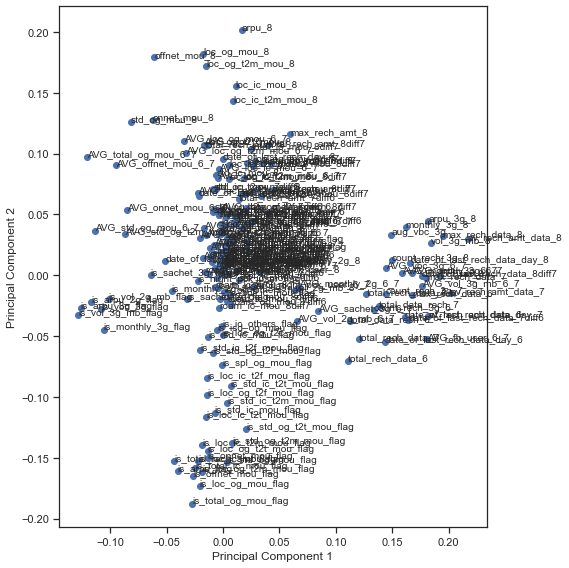

In [94]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [95]:
pca.explained_variance_ratio_

array([7.54352837e-02, 5.22263371e-02, 3.80054398e-02, 2.91606363e-02,
       2.59532987e-02, 2.22214036e-02, 2.06273760e-02, 1.93655524e-02,
       1.62638551e-02, 1.53717639e-02, 1.53082822e-02, 1.47440856e-02,
       1.40255654e-02, 1.34706342e-02, 1.33758923e-02, 1.31152711e-02,
       1.30682829e-02, 1.21921530e-02, 1.17847246e-02, 1.16954899e-02,
       1.13113057e-02, 1.08214657e-02, 1.06645754e-02, 1.03393507e-02,
       1.03004847e-02, 9.85796972e-03, 9.64915872e-03, 9.44187920e-03,
       9.29973679e-03, 9.05929060e-03, 8.94540618e-03, 8.76266481e-03,
       8.62955093e-03, 8.33525616e-03, 8.31342331e-03, 8.20076698e-03,
       8.16683999e-03, 7.99670956e-03, 7.86925782e-03, 7.68232051e-03,
       7.61055747e-03, 7.48886877e-03, 7.30364189e-03, 7.14279545e-03,
       7.01587439e-03, 6.93147685e-03, 6.81666294e-03, 6.74981807e-03,
       6.47122903e-03, 6.37785289e-03, 6.33580030e-03, 6.03108503e-03,
       5.89047840e-03, 5.84273770e-03, 5.77148864e-03, 5.65716034e-03,
      

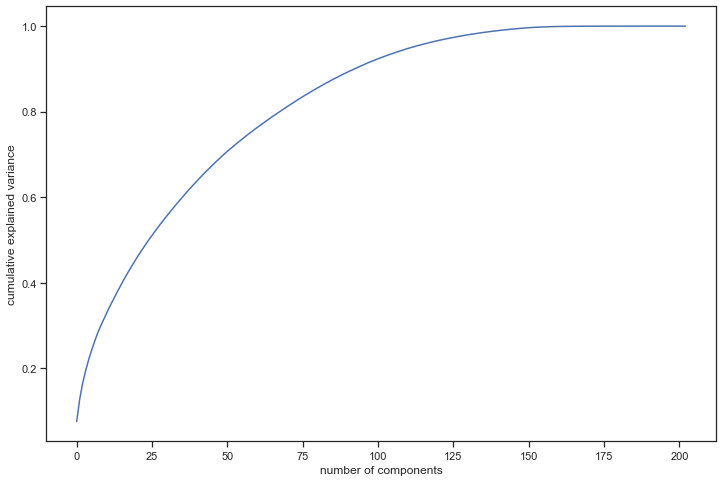

In [96]:
#plot - traçando a variância cumulativa em relação ao número de componentes
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [97]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [7.5 5.2 3.8 2.9 2.6 2.2 2.1 1.9 1.6 1.5 1.5 1.5 1.4 1.3 1.3 1.3 1.3 1.2
 1.2 1.2 1.1 1.1 1.1 1.  1.  1.  1.  0.9 0.9 0.9 0.9 0.9 0.9 0.8 0.8 0.8
 0.8 0.8 0.8 0.8 0.8 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.6 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0. ]


In [98]:
print (pca.explained_variance_ratio_.cumsum())

[0.07543528 0.12766162 0.16566706 0.1948277  0.220781   0.2430024
 0.26362978 0.28299533 0.29925918 0.31463095 0.32993923 0.34468331
 0.35870888 0.37217951 0.38555541 0.39867068 0.41173896 0.42393111
 0.43571584 0.44741133 0.45872263 0.4695441  0.48020867 0.49054803
 0.50084851 0.51070648 0.52035564 0.52979752 0.53909725 0.54815655
 0.55710195 0.56586462 0.57449417 0.58282942 0.59114285 0.59934361
 0.60751045 0.61550716 0.62337642 0.63105874 0.6386693  0.64615817
 0.65346181 0.6606046  0.66762048 0.67455196 0.68136862 0.68811844
 0.69458967 0.70096752 0.70730332 0.7133344  0.71922488 0.72506762
 0.73083911 0.73649627 0.74208537 0.74755826 0.75297948 0.75830994
 0.76349969 0.76864966 0.7737713  0.77878726 0.78376862 0.78868512
 0.79356247 0.79834216 0.80310265 0.80780714 0.81248582 0.81707732
 0.8216576  0.82617121 0.83067599 0.83500741 0.83932098 0.84357424
 0.84777627 0.85190632 0.85597278 0.85993761 0.86384439 0.86770249
 0.87150369 0.8752869  0.87896918 0.88256351 0.8860823  0.88952

In [99]:
# PCA incremental economiza muito tempo em conjuntos de dados maiores
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=54)

In [100]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(23962, 54)

In [101]:
# Criando matrix de correlação para os principais componentes
corrmat = np.corrcoef(df_train_pca.transpose())

<AxesSubplot:>

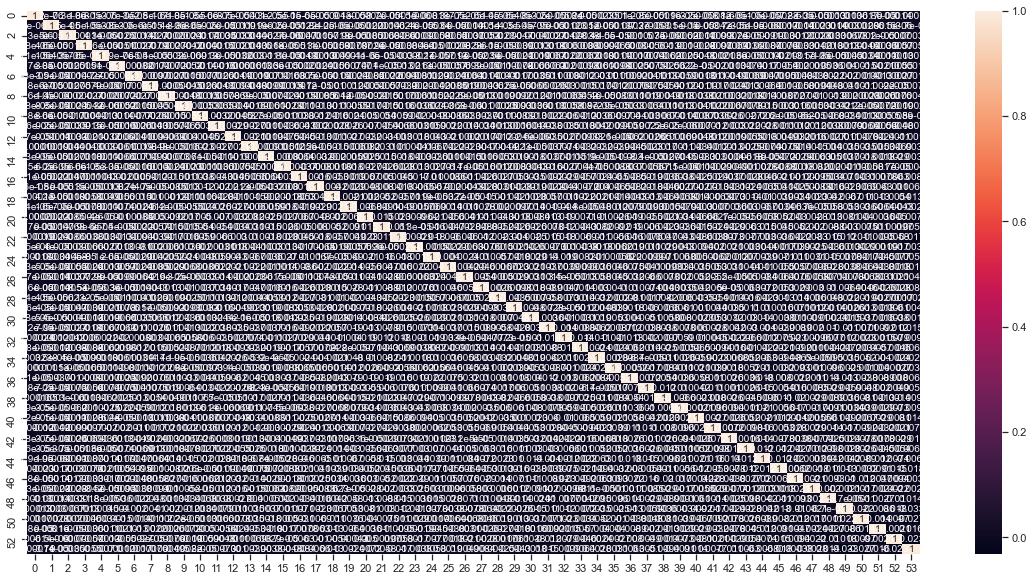

In [102]:
#plot de matrix de correlação.
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [103]:
# 1s -> 0s em diagonais
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# as correlações são realmente muito próximas de 0

max corr: 0.028362129402158154 , min corr:  -0.03261009862686891


In [104]:
#Aplicando componentes selecionados aos dados de teste
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(5991, 54)

### Regressão logística
<br>

Vou primeiro fitar o modelo com os hiperparâmetros default.

In [105]:
#Treinando o modelo
from sklearn.linear_model import LogisticRegression

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [106]:
#Fazendo a predição com os dados de teste
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.89'

- Utilizado 54 componentes, o que poderia explicar quase 85% da variação no conjunto de dados.
- Atingido 89% de área sob a curva no conjunto de teste.

Vou construir mais alguns modelos com componentes variadas para ver se há diferença no resultado final.

In [107]:
pca_last1 = PCA(n_components=48)
df_train_pca1 = pca_last1.fit_transform(X_train)
df_test_pca1 = pca_last1.transform(X_test)
df_test_pca1.shape

(5991, 48)

In [108]:
#Treinando o modelo de regressão
learner_pca1 = LogisticRegression()
model_pca1 = learner_pca1.fit(df_train_pca1,y_train)
#Fazendo a predição com os dados de teste
pred_probs_test1 = model_pca1.predict_proba(df_test_pca1)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test1))

'0.89'

In [109]:
pca_last2 = PCA(n_components=15)
df_train_pca2 = pca_last2.fit_transform(X_train)
df_test_pca2 = pca_last2.transform(X_test)
df_test_pca2.shape

(5991, 15)

In [110]:
#Treinando o modelo de regressão
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)
#Fazendo a predição nos dados de teste
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.88'

## Escolha da Métrica de qualidade

### Regressão logística - com penalidade

In [111]:
from sklearn.feature_selection import RFE

In [112]:
logmodel_CW_dict = LogisticRegression(class_weight='balanced',penalty='l2',random_state=9999,solver='newton-cg',C=10000000,n_jobs=-1)

In [113]:
logmodel_CW_dict.fit(df_train_pca,y_train)

LogisticRegression(C=10000000, class_weight='balanced', n_jobs=-1,
                   random_state=9999, solver='newton-cg')

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      5339
           1       0.34      0.84      0.49       652

    accuracy                           0.81      5991
   macro avg       0.66      0.82      0.68      5991
weighted avg       0.91      0.81      0.84      5991

Accuracy for the test dataset 80.7%
ROC for the test dataset 82.2%


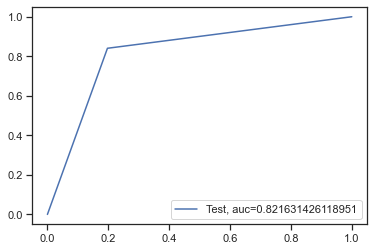

In [114]:
predictions = logmodel_CW_dict.predict(df_test_pca)
prediction_probs = logmodel_CW_dict.predict_proba(df_test_pca)[:,1]
print(classification_report(y_test, predictions))
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()


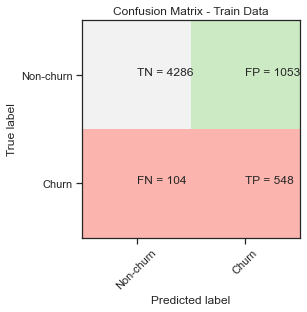

In [115]:
cm = confusion_matrix(y_test, predictions)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

### Metrica Lift

In [116]:
def plotLiftChart(actual, predicted,title_str):
    df_dict = {'actual': list (actual), 'pred': list(predicted)}
    df = pd.DataFrame(df_dict)
    pred_ranks = pd.qcut(df['pred'].rank(method='first'), 100, labels=False)
    actual_ranks = pd.qcut(df['actual'].rank(method='first'), 100, labels=False)
    pred_percentiles = df.groupby(pred_ranks).mean()
    actual_percentiles = df.groupby(actual_ranks).mean()
    plt.title(title_str)
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['pred']),
             color='darkorange', lw=2, label='Prediction')
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['actual']),
             color='navy', lw=2, linestyle='--', label='Actual')
    plt.ylabel('Target Percentile')
    plt.xlabel('Population Percentile')
    plt.xlim([0.0, 1.0])
    plt.ylim([-0.05, 1.05])
    from pylab import rcParams
    rcParams['figure.figsize'] = 10, 4

    plt.legend(loc="best")
    plt.show()

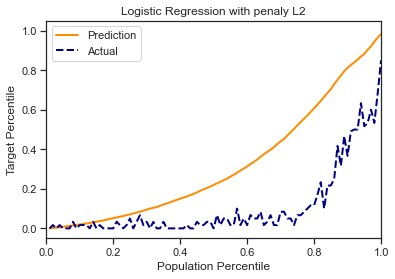

In [117]:
plotLiftChart(y_test.values,prediction_probs,"Logistic Regression with penaly L2")

### Criar amostras estratificadas Kfold

Visando amenizar o dataset desequilibrado para a variavel target..

In [118]:
from sklearn.model_selection  import StratifiedKFold
stratefied_Kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=9999)

In [119]:
from sklearn.linear_model import LogisticRegressionCV

searchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=stratefied_Kfold
        ,random_state=777
        ,max_iter=100
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=1
        ,verbose = 2
        ,n_jobs = -1
    
    )

In [120]:
searchCV.fit(df_train_pca,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    4.6s finished


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     cv=StratifiedKFold(n_splits=4, random_state=9999, shuffle=True),
                     n_jobs=-1, random_state=777, scoring='roc_auc',
                     solver='newton-cg', tol=1, verbose=2)

In [121]:
print("final selected 1/lambda is ", searchCV.C_)
print("final selected lambda is ", 1/searchCV.C_)

final selected 1/lambda is  [0.01]
final selected lambda is  [100.]


              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5339
           1       0.66      0.36      0.46       652

    accuracy                           0.91      5991
   macro avg       0.79      0.67      0.71      5991
weighted avg       0.90      0.91      0.90      5991

Accuracy for the test dataset 91.0%
ROC for the test dataset 88.9%


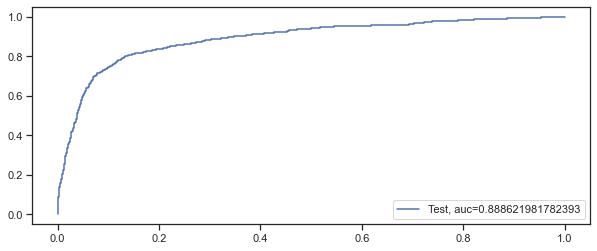

In [122]:
#Dados de treino
preds_L2Search = searchCV.predict(df_test_pca)
preds_L2Search_probs = searchCV.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_L2Search))
accuracy = metrics.accuracy_score(y_test, preds_L2Search)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_L2Search_probs)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()


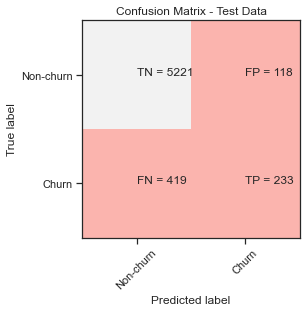

In [123]:
cm = confusion_matrix(y_test, preds_L2Search)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

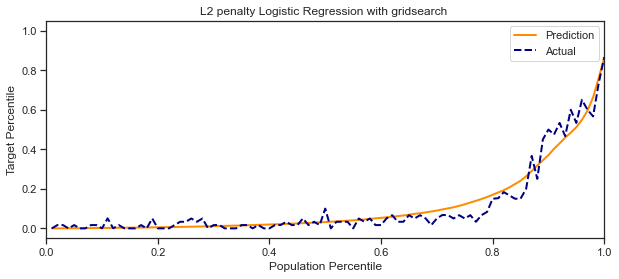

In [124]:
plotLiftChart(y_test.values,preds_L2Search_probs,"L2 penalty Logistic Regression with gridsearch ")

### Random Forest 
<br>

Vou primeiro fitar um modelo random forest com os hiperparâmetros em default.

In [125]:
from sklearn.ensemble import RandomForestClassifier
RFC_balanced = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=500, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_split=1e-07,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample")


In [126]:
TrainedRFC= RFC_balanced.fit(df_train_pca,y_train)

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      5339
           1       0.38      0.81      0.52       652

    accuracy                           0.83      5991
   macro avg       0.68      0.82      0.71      5991
weighted avg       0.91      0.83      0.86      5991

Accuracy for the test dataset 83.5%
ROC for the test dataset 88.5%


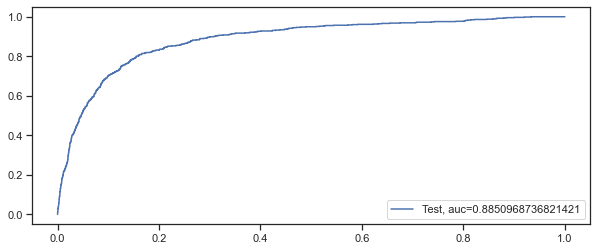

In [127]:
preds_RFC=TrainedRFC.predict(df_test_pca)
preds_probs_RFC=TrainedRFC.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

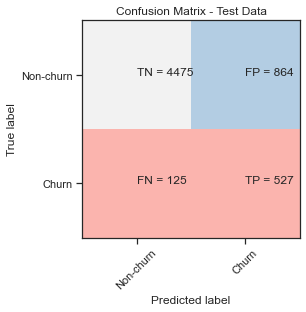

In [128]:
cm = confusion_matrix(y_test, preds_RFC)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

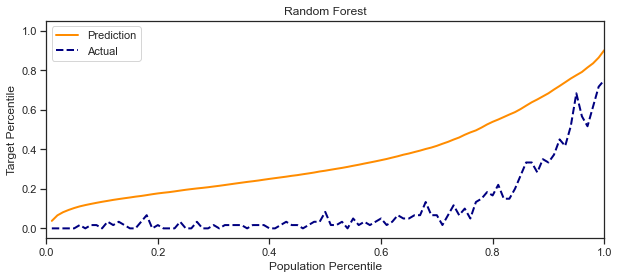

In [129]:
plotLiftChart(y_test.values,preds_probs_RFC,"Random Forest")

In [130]:
importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(col_names, list(importances)), reverse=True),columns={'value', 'colName'})
sorted_feature_importance.sort_values(inplace=True, by = 'value')

In [131]:
sorted_feature_importance['colName'][:50]

53   0.00
52   0.01
51   0.03
50   0.00
49   0.01
48   0.02
47   0.00
46   0.04
45   0.00
44   0.01
43   0.02
42   0.00
41   0.02
40   0.01
39   0.00
38   0.00
37   0.00
36   0.01
35   0.00
34   0.00
33   0.00
32   0.02
31   0.00
30   0.01
29   0.00
28   0.02
27   0.01
26   0.01
25   0.01
24   0.02
23   0.02
22   0.01
21   0.00
20   0.00
19   0.02
18   0.07
17   0.01
16   0.36
15   0.05
14   0.04
13   0.00
12   0.02
11   0.00
10   0.00
9    0.03
8    0.00
7    0.01
6    0.00
5    0.01
4    0.01
Name: colName, dtype: float64

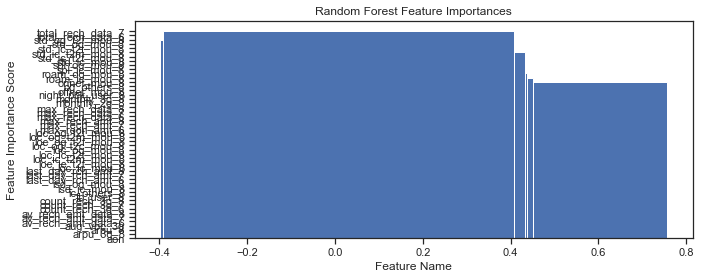

In [132]:
plt.clf()
from pylab import rcParams
rcParams['figure.figsize'] = 20, 9
plt.bar(sorted_feature_importance['colName'][0:50], sorted_feature_importance['value'][0:50])
plt.title('Random Forest Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Name')
plt.show()

### Gradient boosting

In [133]:
from sklearn import ensemble

# Fit de classificador com estimativas out-of-bag
params = {'n_estimators': 200, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 10, 'random_state': 9999}
GBC = ensemble.GradientBoostingClassifier(**params)

In [134]:
GBC.fit(df_train_pca,y_train)

GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=10,
                           n_estimators=200, random_state=9999, subsample=0.5)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5339
           1       0.69      0.36      0.47       652

    accuracy                           0.91      5991
   macro avg       0.81      0.67      0.71      5991
weighted avg       0.90      0.91      0.90      5991

Accuracy for the test dataset 91.3%
ROC for the test dataset 89.1%


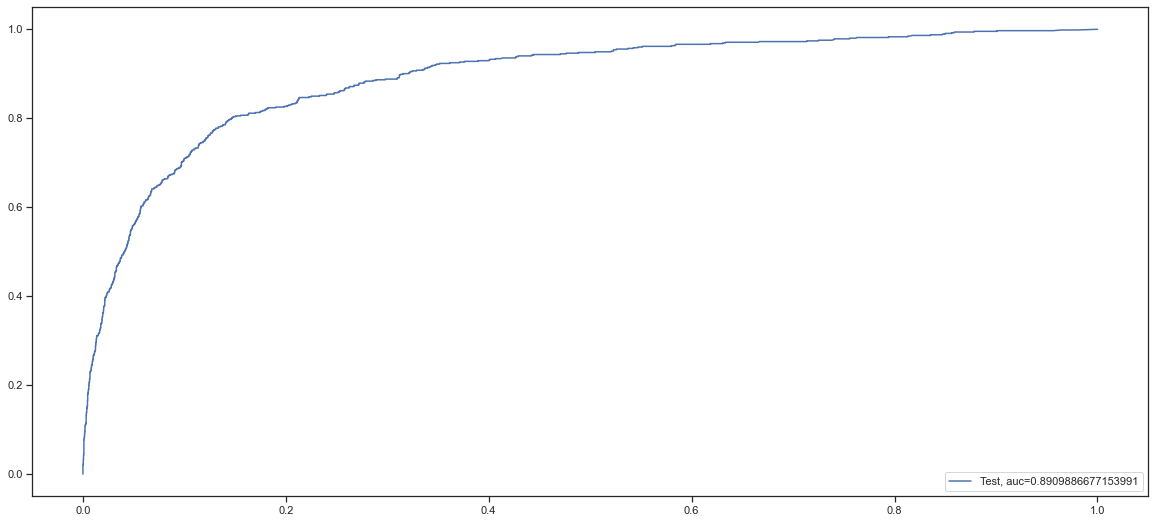

In [135]:
preds_GBC = GBC.predict(df_test_pca)
preds_probs_GBC = GBC.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_GBC))
accuracy = metrics.accuracy_score(y_test, preds_GBC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy))

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_GBC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

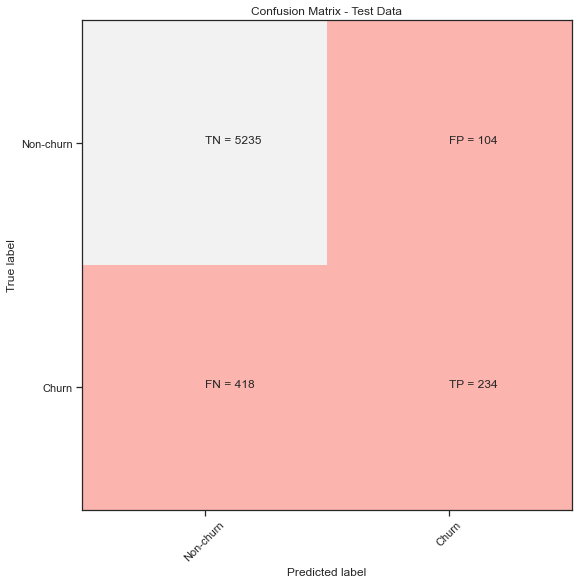

In [136]:
cm = confusion_matrix(y_test, preds_GBC)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

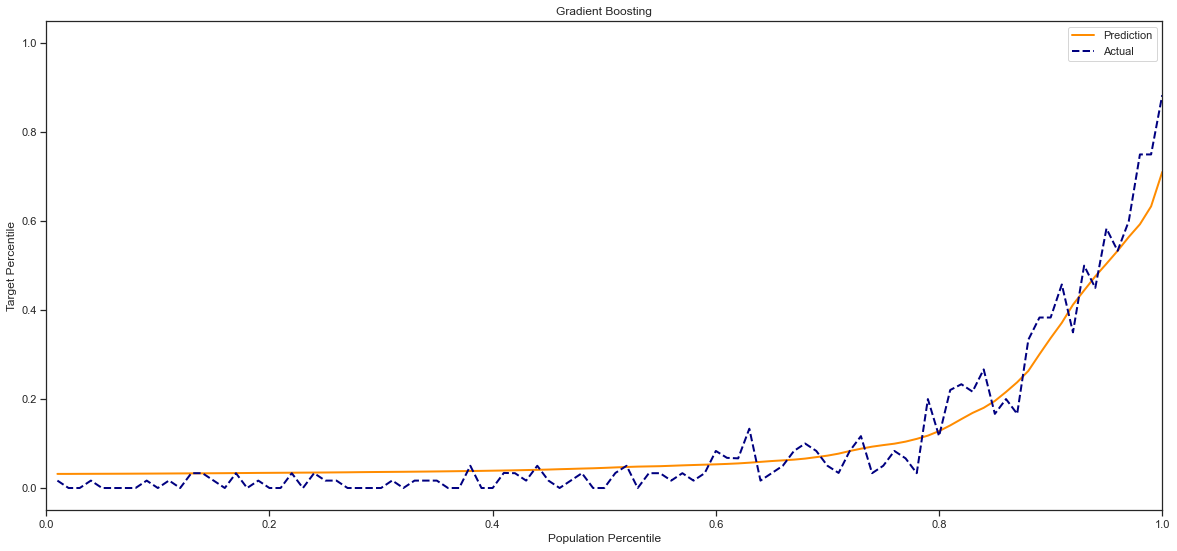

In [137]:
plotLiftChart(y_test.values,preds_probs_GBC,"Gradient Boosting")

### Gradient Boosting com ajuste de hiperparâmetros

Agora, vamos tentar ajustar os hiperparâmetros no classificador Gradient Boosting. Começando com dois hiperparâmetros - n_estimators e max_depth.

- n_estimators: inteiro, opcional (padrão = 10): O número de árvores na floresta
- max_depth: inteiro ou Nenhum, opcional (padrão = Nenhum) A profundidade máxima da árvore. Se nenhum, os nós são expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos que min_samples_split samples

#### Mudança nos estimadores & max_depth

In [138]:
from sklearn.model_selection import GridSearchCV   

# Classificador de ajuste com estimativas out-of-bag
param_test = {'n_estimators':range(200,500,100), 'max_depth':range(5,8,1)}

gsearch1 = GridSearchCV(
    estimator = ensemble.GradientBoostingClassifier(
        learning_rate=0.05,
        min_samples_split=20,
        min_samples_leaf=10,
        subsample=0.1,
        random_state=9999,verbose = 2,), param_grid = param_test, scoring='roc_auc',n_jobs=-1, cv=None,verbose=2)


In [139]:
gsearch1.fit(df_train_pca,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.6568           0.0316           29.18s
         2           0.5676           0.0235           27.35s
         3           0.5933           0.0174           26.85s
         4           0.6014           0.0162           26.39s
         5           0.5725           0.0145           26.41s
         6           0.5242           0.0121           26.15s
         7           0.5136           0.0100           25.96s
         8           0.5322           0.0096           25.73s
         9           0.5228           0.0092           25.59s
        10           0.5098           0.0076           25.34s
        11           0.5019           0.0057           25.22s
        12           0.5221           0.0072           25.05s
        13           0.4919           0.0049           24.91s
        14           0.5035           0.0060           24.74s
        1

       133           0.3749          -0.0000            9.50s
       134           0.3725          -0.0003            9.35s
       135           0.3530          -0.0008            9.22s
       136           0.3793          -0.0002            9.08s
       137           0.3775           0.0001            8.93s
       138           0.3609           0.0002            8.79s
       139           0.3644           0.0001            8.64s
       140           0.3600           0.0000            8.50s
       141           0.3701          -0.0004            8.35s
       142           0.3876          -0.0000            8.20s
       143           0.3607           0.0001            8.06s
       144           0.3781           0.0002            7.92s
       145           0.3644          -0.0001            7.77s
       146           0.3832           0.0001            7.63s
       147           0.3259          -0.0002            7.50s
       148           0.3571          -0.0002            7.37s
       1

GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  min_samples_leaf=10,
                                                  min_samples_split=20,
                                                  random_state=9999,
                                                  subsample=0.1, verbose=2),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 8),
                         'n_estimators': range(200, 500, 100)},
             scoring='roc_auc', verbose=2)

In [140]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 5, 'n_estimators': 200}, 0.891545848190278)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5339
           1       0.62      0.49      0.55       652

    accuracy                           0.91      5991
   macro avg       0.78      0.73      0.75      5991
weighted avg       0.90      0.91      0.91      5991

Accuracy for the test dataset 91.2%
ROC for the test dataset 89.7%


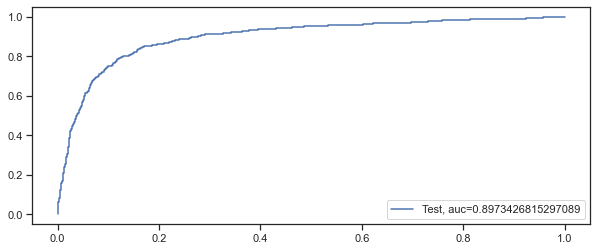

In [141]:
preds_GBC_HT = gsearch1.predict(df_test_pca)
preds_GBC_probs_HT = gsearch1.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_GBC_HT))
accuracy = metrics.accuracy_score(y_test, preds_GBC_HT)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_GBC_probs_HT)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

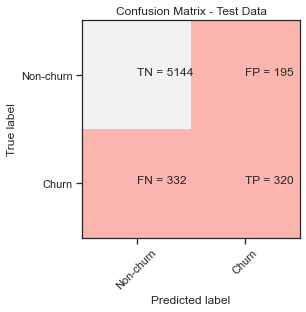

In [142]:
cm = confusion_matrix(y_test, preds_GBC_HT)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

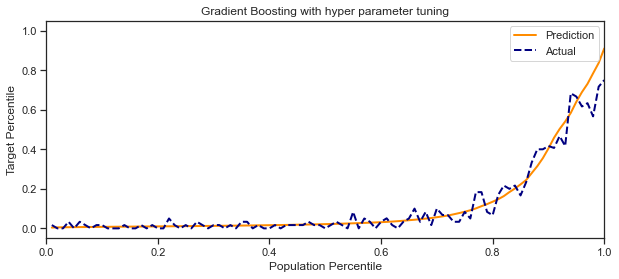

In [143]:
plotLiftChart(y_test.values,preds_GBC_probs_HT,"Gradient Boosting with hyper parameter tuning")

#### Modificação em min_samples_leaf 

Agora vamos ajustar min_samples_leaf
- min_samples_leaf: (default = 1) O número mínimo de amostras necessárias para estar em um nó folha:
     - Se int, considere min_samples_leaf como o número mínimo.
     - Se float, min_samples_leaf é uma porcentagem e ceil (min_samples_leaf * n_samples) é o número mínimo de amostras para cada nó.

In [144]:
param_test = {'min_samples_leaf': range(10,100,20)}

gsearch1 = GridSearchCV(
    estimator = ensemble.GradientBoostingClassifier(
        n_estimators = 100,
        learning_rate=0.05,
        max_depth = 5,
        min_samples_split=100,
        subsample=0.1,
        random_state=9999,verbose = 2,), param_grid = param_test, scoring='roc_auc',n_jobs=-1,cv=None,verbose=2)


In [145]:
gsearch1.fit(df_train_pca,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.6662           0.0302           11.16s
         2           0.5805           0.0230           11.34s
         3           0.6043           0.0174           11.41s
         4           0.6139           0.0153           11.62s
         5           0.5886           0.0144           11.46s
         6           0.5396           0.0123           11.27s
         7           0.5305           0.0091           11.24s
         8           0.5522           0.0099           11.08s
         9           0.5411           0.0082           11.00s
        10           0.5298           0.0077           10.87s
        11           0.5202           0.0070           10.72s
        12           0.5411           0.0066           10.60s
        13           0.5094           0.0050           10.62s
        14           0.5205           0.0053           10.47s
        1

GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  max_depth=5,
                                                  min_samples_split=100,
                                                  random_state=9999,
                                                  subsample=0.1, verbose=2),
             n_jobs=-1, param_grid={'min_samples_leaf': range(10, 100, 20)},
             scoring='roc_auc', verbose=2)

In [146]:
gsearch1.best_params_, gsearch1.best_score_

({'min_samples_leaf': 70}, 0.8928570394161468)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      5339
           1       0.63      0.45      0.53       652

    accuracy                           0.91      5991
   macro avg       0.78      0.71      0.74      5991
weighted avg       0.90      0.91      0.91      5991

Accuracy for the test dataset 91.2%
ROC for the test dataset 90.3%


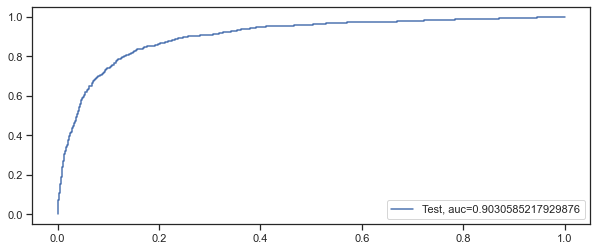

In [147]:
preds_GBC_HT = gsearch1.predict(df_test_pca)
preds_GBC_probs_HT = gsearch1.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_GBC_HT))
accuracy = metrics.accuracy_score(y_test, preds_GBC_HT)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_GBC_probs_HT)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

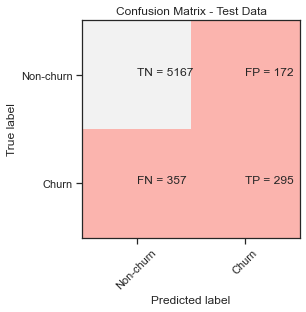

In [148]:
cm = confusion_matrix(y_test, preds_GBC_HT)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

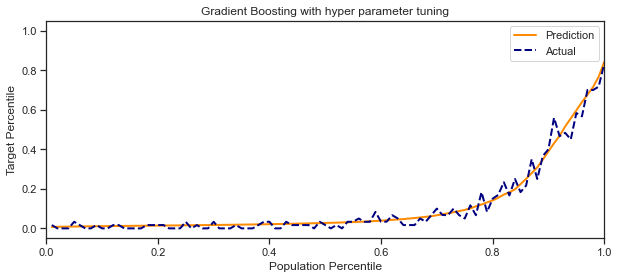

In [149]:
plotLiftChart(y_test.values,preds_GBC_probs_HT,"Gradient Boosting with hyper parameter tuning")

### SVM utilizando kernel não linear

Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5339
           1       0.71      0.42      0.53       652

    accuracy                           0.92      5991
   macro avg       0.82      0.70      0.74      5991
weighted avg       0.91      0.92      0.91      5991


Accuracy for the test dataset 91.9%

ROC for the test dataset 69.9%


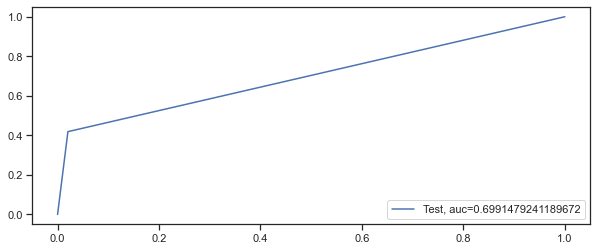

In [150]:
from sklearn import svm
# rbf kernel com outros hiperparâmetros mantidos em default
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(df_train_pca, y_train)
# predição
predictions = svm_rbf.predict(df_test_pca)
print("Classification report: ")
print(classification_report(y_test,predictions))
accuracy = metrics.accuracy_score(y_test, predictions)
print("\nAccuracy for the test dataset",'{:.1%}'.format(accuracy) )
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("\nROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

## Construção do modelo

#### Em features originais (ao invés de componentes principais)

Ajustam-se os hiperparâmetros usando um habilitado para GPU e identificamos os melhores. <br> Abaixo está o código para o mesmo.
<br>

**Nota:**
*** Essa etapa é demorada, cerca de 20 horas. ***
<br>

### XGBoost - Descobrindo os melhores hiperparâmetros

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'gamma': "{:.3f}".format(params['gamma']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
    }
    
    clf = xgb.XGBClassifier(
        n_estimators=250,
        learning_rate=0.05,
        n_jobs=4,
        **params
    )
    
    score = cross_val_score(clf, X_train, y_train, scoring='f1_weighted', cv=StratifiedKFold()).mean()
    print("F1 score {:.3f} params {}".format(score, params))
    return score

space = {
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'gamma': hp.uniform('gamma', 0.0, 0.5),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)

In [151]:
#print("Estimativa ideal {}".format(best))

# O resultado que obtive após o "tunar":
# estimated optimum {'colsample_bytree': 0.552933848345107, 'gamma': 0.22715962641133935, 'max_depth': 8.0}

In [152]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

In [153]:
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=111)

xgb_model = xgb.XGBClassifier(
    n_estimators=250,
    learning_rate=0.05,
    n_jobs=4,
    max_depth=8,
    colsample_bytree=0.55,
    gamma=0.23,
)

xgb_model.fit(X=X_train,y=y_train)

[17:13:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.55, gamma=0.23, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [154]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring = 'roc_auc')
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

[17:14:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:15:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:16:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:17:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

A validação cruzada nos mostra que os modelos caminham bem, já que a média é um valor alto.

In [155]:
predictions_train = xgb_model.predict(X_train)
print(classification_report(y_train, predictions_train))
predictions = xgb_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21359
           1       0.98      0.97      0.97      2603

    accuracy                           0.99     23962
   macro avg       0.99      0.98      0.99     23962
weighted avg       0.99      0.99      0.99     23962

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5339
           1       0.70      0.57      0.63       652

    accuracy                           0.93      5991
   macro avg       0.82      0.77      0.79      5991
weighted avg       0.92      0.93      0.92      5991



In [156]:
def Performance(Model,Y,X):
    # Perforamnce do modelo
    fpr, tpr, _ = roc_curve(Y, Model.predict_proba(X)[:,1])
    AUC  = auc(fpr, tpr)
    print ('the AUC is : %0.4f' %  AUC)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

the AUC is : 0.9347


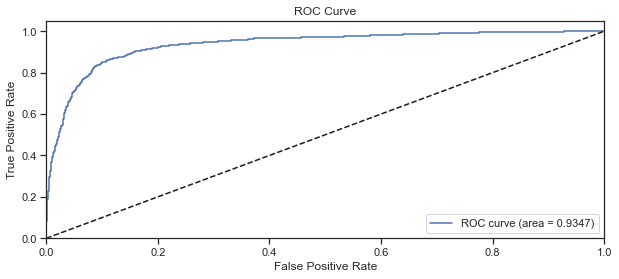

In [157]:
Performance(Model=xgb_model,Y=y_test,X=X_test)

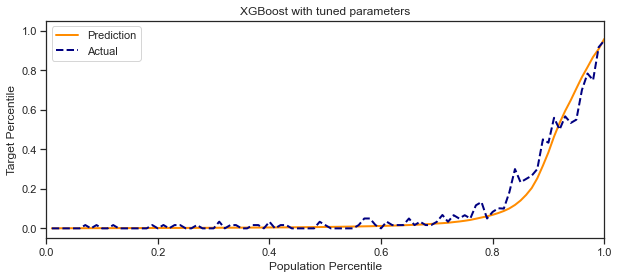

In [158]:
plotLiftChart(y_test.values,xgb_model.predict_proba(X_test)[:,1],"XGBoost with tuned parameters")

### Random Forest

from sklearn.model_selection import cross_val_score
def acc_model(params):
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()

param_space = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,100)),
    'n_estimators': hp.choice('n_estimators', range(100,500)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])}

best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=100, trials=trials)
print ('best:')
print (best)

In [159]:
from sklearn.ensemble import RandomForestClassifier

RF2=RandomForestClassifier(max_features=94, n_estimators=200, criterion= 'entropy', max_depth=15,random_state=111, class_weight='balanced')
RF2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features=94, n_estimators=200,
                       random_state=111)

In [160]:
scores = cross_val_score(RF2, X_train, y_train, cv=cv, scoring = 'roc_auc')
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.93623452 0.94060765 0.93170196 0.93034968 0.91341202 0.93367545
 0.93726862 0.9355013  0.93971388 0.93921416]
Mean: 0.9337679232556063
Standard Deviation: 0.0075064310541348165


In [161]:
predictions_train = RF2.predict(X_train)
print(classification_report(y_train, predictions_train))
predictions = RF2.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     21359
           1       0.88      1.00      0.94      2603

    accuracy                           0.99     23962
   macro avg       0.94      0.99      0.96     23962
weighted avg       0.99      0.99      0.99     23962

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5339
           1       0.66      0.65      0.65       652

    accuracy                           0.93      5991
   macro avg       0.81      0.80      0.81      5991
weighted avg       0.92      0.93      0.92      5991



In [162]:
preds_probs_RFC=RF2.predict_proba(X_test)[:,1]

the AUC is : 0.9365


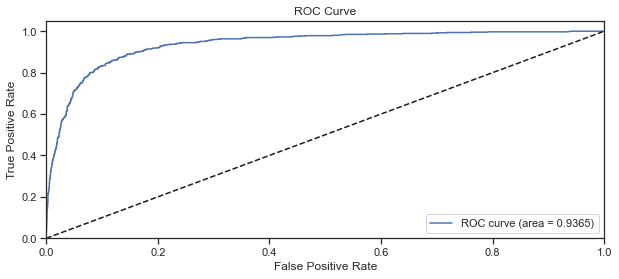

In [163]:
Performance(Model=RF2,Y=y_test,X=X_test)

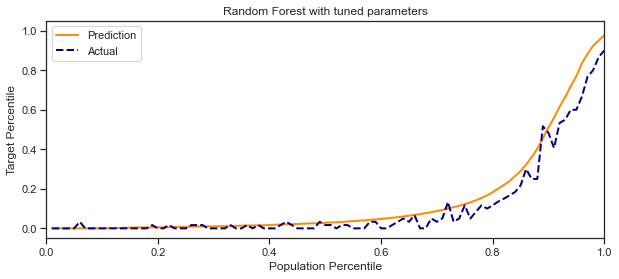

In [164]:
plotLiftChart(y_test.values,preds_probs_RFC,"Random Forest with tuned parameters")

In [165]:
importances = RF2.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

value                        colName
0     0.15                   loc_ic_mou_8
1     0.07               loc_og_t2m_mou_8
2     0.06               loc_ic_t2m_mou_8
3     0.05                   loc_og_mou_8
4     0.04             last_day_rch_amt_8
5     0.03       date_of_last_rech_8diff7
6     0.03        date_of_last_rech_day_8
7     0.02          total_rech_amt_8diff7
8     0.02                         arpu_8
9     0.01             roam_og_mou_8diff7
10    0.01                   offnet_mou_8
11    0.01                     aug_vbc_3g
12    0.01               loc_ic_t2t_mou_8
13    0.01                  roam_og_mou_8
14    0.01                 max_rech_amt_8
15    0.01                max_rech_data_8
16    0.01                            aon
17    0.01               loc_og_t2t_mou_8
18    0.01             av_rech_amt_data_8
19    0.01            total_ic_mou_8diff7
20    0.01                    vol_2g_mb_8
21    0.01              std_og_mou_8diff7
22    0.01              loc_ic_mou_8diff7
23    0.01                   AVG_arpu_6_7
24    0.01                    vol_3g_mb_8
25    0.01                  roam_ic_mou_8
26    0.01          loc_ic_t2t_mou_8diff7
27    0.01          loc_og_t2t_mou_8diff7
28    0.01                    onnet_mou_8
29    0.01          loc_ic_t2m_mou_8diff7
30    0.01              loc_og_mou_8diff7
31    0.01          total_rech_amt_7diff6
32    0.01          loc_og_t2m_mou_8diff7
33    0.00             AVG_std_og_mou_6_7
34    0.00         AVG_loc_ic_t2t_mou_6_7
35    0.00  date_of_last_rech_data_8diff7
36    0.00                   std_ic_mou_8
37    0.00             AVG_loc_ic_mou_6_7
38    0.00               loc_ic_t2f_mou_8
39    0.00                 max_rech_amt_6
40    0.00          loc_og_t2m_mou_7diff6
41    0.00          loc_ic_t2t_mou_7diff6
42    0.00                   std_og_mou_8
43    0.00             AVG_offnet_mou_6_7
44    0.00                 max_rech_amt_7
45    0.00          loc_ic_t2m_mou_7diff6
46    0.00          loc_og_t2t_mou_7diff6
47    0.00               vol_2g_mb_8diff7
48    0.00         AVG_loc_og_t2m_mou_6_7
49    0.00           AVG_total_og_mou_6_7
50    0.00         AVG_loc_ic_t2f_mou_6_7
51    0.00               loc_og_t2f_mou_8
52    0.00          std_ic_t2m_mou_8diff7
53    0.00               vol_2g_mb_7diff6
54    0.00         AVG_loc_ic_t2m_mou_6_7
55    0.00               total_rech_num_8
56    0.00              loc_og_mou_7diff6
57    0.00             AVG_loc_og_mou_6_7
58    0.00          std_og_t2t_mou_7diff6
59    0.00          std_og_t2m_mou_8diff7
60    0.00              std_ic_mou_8diff7
61    0.00          std_ic_t2m_mou_7diff6
62    0.00       date_of_last_rech_7diff6
63    0.00             roam_ic_mou_8diff7
64    0.00          std_og_t2t_mou_8diff7
65    0.00             last_day_rch_amt_7
66    0.00              loc_ic_mou_7diff6
67    0.00         AVG_loc_og_t2t_mou_6_7
68    0.00   date_of_last_rech_data_day_8
69    0.00          loc_ic_t2f_mou_7diff6
70    0.00              spl_og_mou_8diff7
71    0.00              AVG_vol_2g_mb_6_7
72    0.00              AVG_onnet_mou_6_7
73    0.00               vol_3g_mb_8diff7
74    0.00          std_og_t2m_mou_7diff6
75    0.00          std_ic_t2t_mou_7diff6
76    0.00              std_ic_mou_7diff6
77    0.00              std_og_mou_7diff6
78    0.00              spl_og_mou_7diff6
79    0.00             last_day_rch_amt_6
80    0.00            AVG_roam_og_mou_6_7
81    0.00          loc_ic_t2f_mou_8diff7
82    0.00                  vbc_3g_8diff7
83    0.00                 AVG_vbc_3g_6_7
84    0.00          std_ic_t2t_mou_8diff7
85    0.00             AVG_spl_og_mou_6_7
86    0.00          loc_og_t2f_mou_7diff6
87    0.00         AVG_std_ic_t2m_mou_6_7
88    0.00               std_ic_t2m_mou_8
89    0.00            is_roam_og_mou_flag
90    0.00             AVG_std_ic_mou_6_7
91    0.00                  vbc_3g_7diff6
92    0.00        date_of_last_rech_day_6
93    0.00         AVG_std_og_t2m_mou_6_7
94    0.00     

<Figure size 720x288 with 0 Axes>

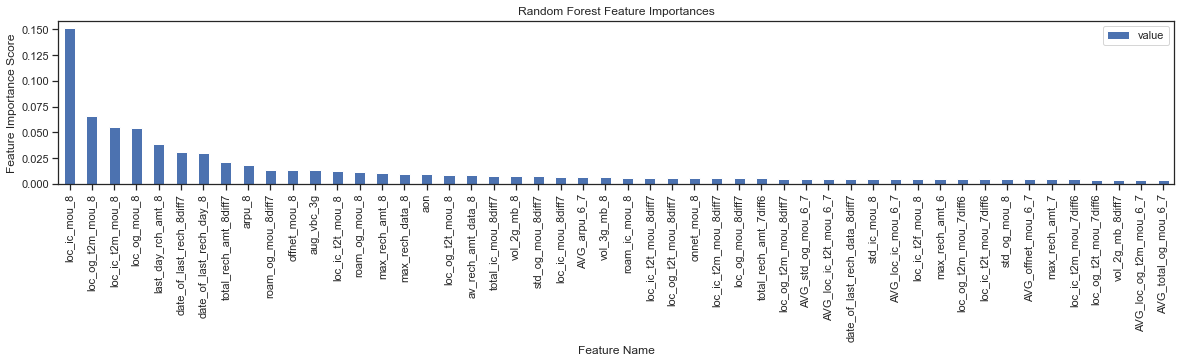

In [166]:
plt.clf()
from pylab import rcParams
rcParams['figure.figsize'] = 20, 3
sorted_feature_importance[0:50].plot(x='colName', y='value' , kind='bar', title='Random Forest Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Name')

plt.show()

### Support Vector Machine

In [167]:
from sklearn import svm 

svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      5339
           1       0.87      0.19      0.31       652

    accuracy                           0.91      5991
   macro avg       0.89      0.59      0.63      5991
weighted avg       0.90      0.91      0.88      5991

Accuracy for the test dataset 90.8%
ROC for the test dataset 59.2%


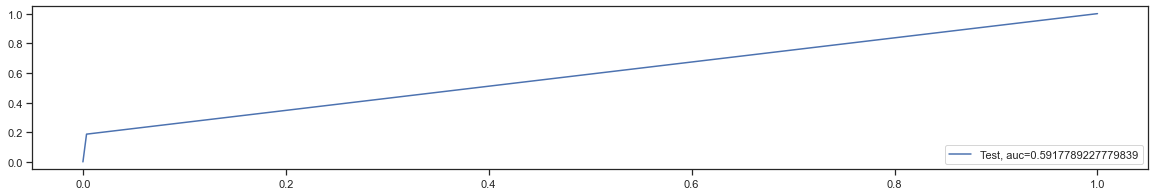

In [168]:
preds_SVM_lin = svm_linear.predict(X_test)
#preds_SVM_lin_probs = svm_linear.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_SVM_lin))
accuracy = metrics.accuracy_score(y_test, preds_SVM_lin)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_SVM_lin)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

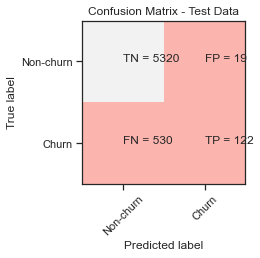

In [169]:
cm = confusion_matrix(y_test, preds_SVM_lin)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

### SVM com kernel não linear
Função de base radial (RBF)

In [170]:
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC()

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5339
           1       0.74      0.43      0.55       652

    accuracy                           0.92      5991
   macro avg       0.84      0.71      0.75      5991
weighted avg       0.91      0.92      0.91      5991

Accuracy for the test dataset 92.2%
ROC for the test dataset 70.7%


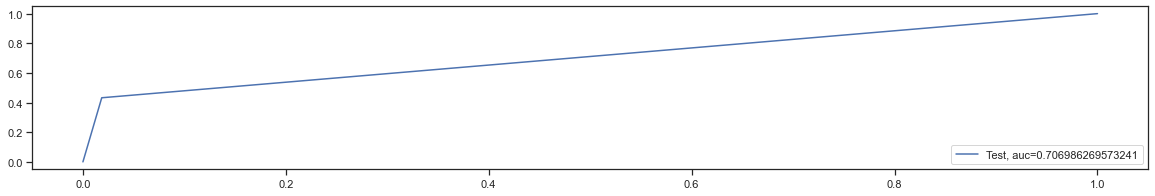

In [171]:
preds_SVM_rbf = svm_rbf.predict(X_test)
#preds_SVM_rbf_probs = svm_rbf.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_SVM_rbf))
accuracy = metrics.accuracy_score(y_test, preds_SVM_rbf)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_SVM_rbf)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

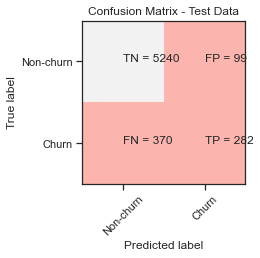

In [172]:
cm = confusion_matrix(y_test, preds_SVM_rbf)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

### Ada Boost(Adaptive Boost)

In [173]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# estimador de base: um apredizado fraco com max_depth = 2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)
# Fitando a árvore de decisão rasa
shallow_tree.fit(X_train, y_train)
# Erro de teste
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.9218828242363545

In [174]:
# adaboost com a árvore como estimador de base

estimators = list(range(50, 100, 3))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)

In [175]:
abc_scores

[0.9210482390252045,
 0.9222166583208146,
 0.9215489901518945,
 0.9230512435319647,
 0.9240527457853447,
 0.9233850776164246,
 0.9210482390252045,
 0.9220497412785845,
 0.9217159071941246,
 0.9218828242363545,
 0.9217159071941246,
 0.9210482390252045,
 0.9213820731096645,
 0.9217159071941246,
 0.9213820731096645,
 0.9212151560674345,
 0.9203805708562844]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5339
           1       0.71      0.48      0.57       652

    accuracy                           0.92      5991
   macro avg       0.82      0.73      0.77      5991
weighted avg       0.91      0.92      0.92      5991

Accuracy for the test dataset 92.2%
ROC for the test dataset 72.9%


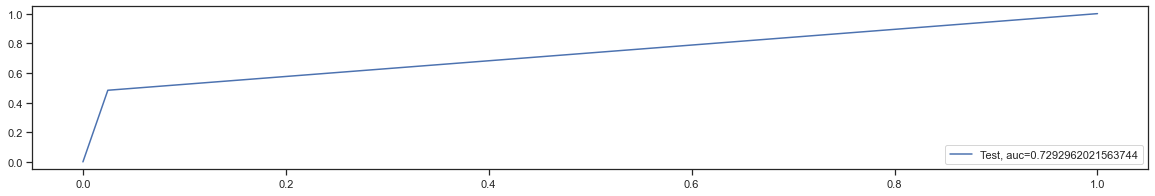

In [176]:
#após ver a pontuação acima, podemos dizer que adaboost está fornecendo melhores resultados quando a estimativa é 1
ABC = AdaBoostClassifier(
base_estimator=shallow_tree, 
    n_estimators = 1)
    
ABC.fit(X_train, y_train)
predictions = ABC.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
accuracy = metrics.accuracy_score(y_test, predictions)
print("Classification Report:")
print(classification_report(y_test,predictions))
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

Accuracy for the test dataset 92.0%
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5339
           1       0.65      0.57      0.61       652

    accuracy                           0.92      5991
   macro avg       0.80      0.76      0.78      5991
weighted avg       0.92      0.92      0.92      5991

ROC for the test dataset 76.5%


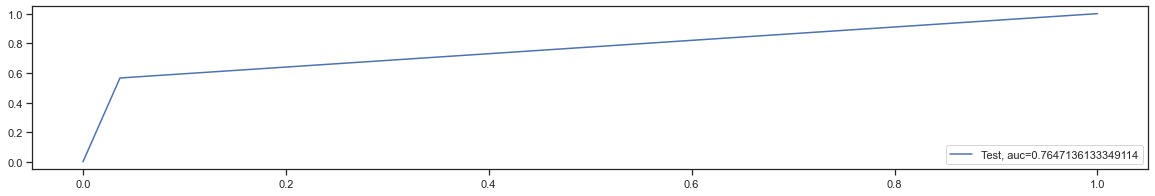

In [177]:
# Teste em 100 árvores
ABC = AdaBoostClassifier(
base_estimator=shallow_tree, 
    n_estimators = 100)
    
ABC.fit(X_train, y_train)
predictions = ABC.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
print(classification_report(y_test,predictions))
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

### Naive Bayes

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      5339
           1       0.49      0.61      0.54       652

    accuracy                           0.89      5991
   macro avg       0.72      0.77      0.74      5991
weighted avg       0.90      0.89      0.89      5991

Accuracy for the test dataset 88.9%
ROC for the test dataset 76.7%


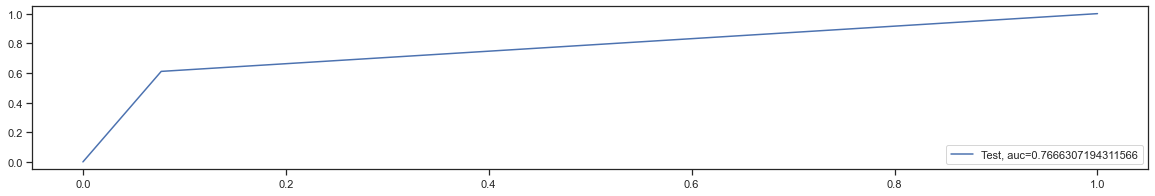

In [178]:
# Treinando o modelo NB e fazendo predições
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
Minmaxscaler = MinMaxScaler()
X_scaled = Minmaxscaler.fit_transform(X)

X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(X_scaled,Y, train_size=0.8,test_size=0.2,random_state=111)

mnb = MultinomialNB()

# fit
mnb.fit(X_train_NB,y_train_NB)

# prevendo classifição
predictions = mnb.predict(X_test_NB)

# prevendo probabilidades
y_pred_proba = mnb.predict_proba(X_test_NB)
accuracy = metrics.accuracy_score(y_test_NB, predictions)
print("Classification Report:")
print(classification_report(y_test_NB,predictions))
fpr, tpr, threshold = metrics.roc_curve(y_test_NB, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

### Conjunto de dados desbalanceados
- Já que se trata de um conjunto de dados desbalanceado, precisamos fazer modificações necessárias para ajustes. 
### Abordagens para lidar com conjuntos de dados desequilibrados
- Técnica de Reamostragem
- Técnica Conjunto algoritmo

### Técnicas de reamostragem para equilibrar o conjunto de dados

### Amostragem aleatória

In [179]:
from imblearn.over_sampling import SMOTE

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (23962, 203)
Number transactions y_train dataset:  (23962,)
Number transactions X_test dataset:  (5991, 203)
Number transactions y_test dataset:  (5991,)


In [180]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 2603
Before OverSampling, counts of label '0': 21359 

After OverSampling, the shape of train_X: (42718, 203)
After OverSampling, the shape of train_y: (42718,) 

After OverSampling, counts of label '1': 21359
After OverSampling, counts of label '0': 21359


## Regressão logística com penalidade

Conjunto de dados reamostrado

In [181]:
from sklearn.linear_model import LogisticRegressionCV

searchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=stratefied_Kfold
        ,random_state=777
        ,max_iter=100
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=1
        ,verbose = 2
        ,n_jobs = -1
    
    )

In [182]:
searchCV.fit(X_train_res,y_train_res)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   30.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   30.1s finished


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     cv=StratifiedKFold(n_splits=4, random_state=9999, shuffle=True),
                     n_jobs=-1, random_state=777, scoring='roc_auc',
                     solver='newton-cg', tol=1, verbose=2)

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      5339
           1       0.40      0.81      0.53       652

    accuracy                           0.85      5991
   macro avg       0.69      0.83      0.72      5991
weighted avg       0.91      0.85      0.87      5991

Accuracy for the test dataset 84.5%
ROC for the test dataset 89.6%


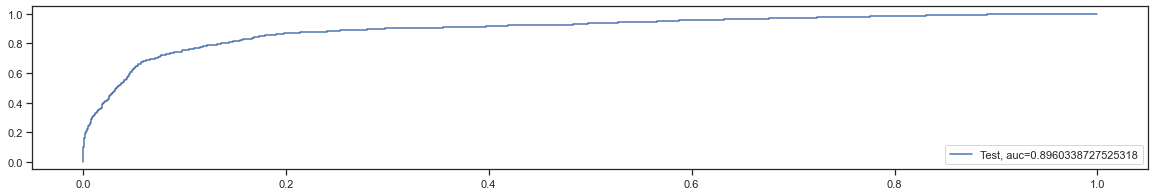

In [183]:
#Dados de treino
preds_L2Search = searchCV.predict(X_test)
preds_L2Search_probs = searchCV.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_L2Search))
accuracy = metrics.accuracy_score(y_test, preds_L2Search)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_L2Search_probs)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()


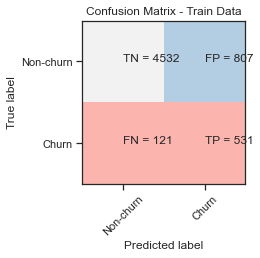

In [184]:
cm = confusion_matrix(y_test, preds_L2Search)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

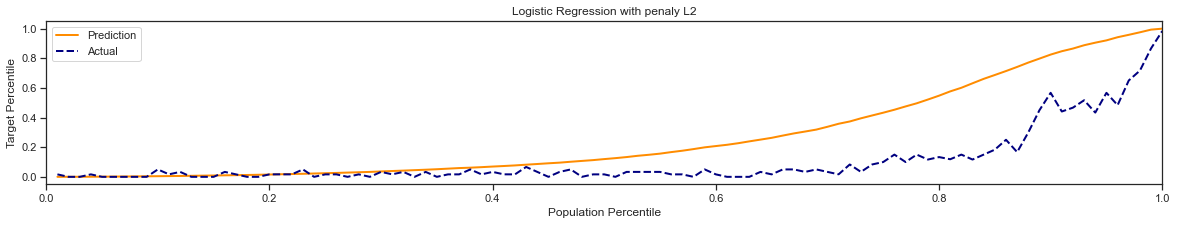

In [185]:
plotLiftChart(y_test.values,preds_L2Search_probs,"Logistic Regression with penaly L2")

### Random Forest

Conjunto de dados reamostrado

In [186]:
TrainedRFC= RFC_balanced.fit(X_train_res,y_train_res)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      5339
           1       0.52      0.72      0.60       652

    accuracy                           0.90      5991
   macro avg       0.74      0.82      0.77      5991
weighted avg       0.92      0.90      0.90      5991

Accuracy for the test dataset 89.7%
ROC for the test dataset 91.6%


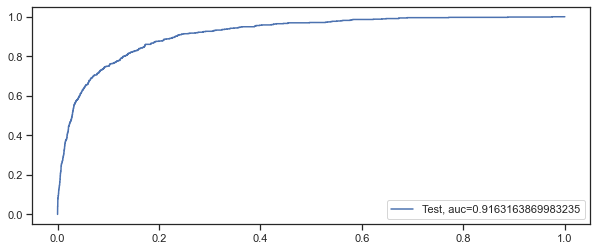

In [187]:
preds_RFC=TrainedRFC.predict(X_test)
preds_probs_RFC=TrainedRFC.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

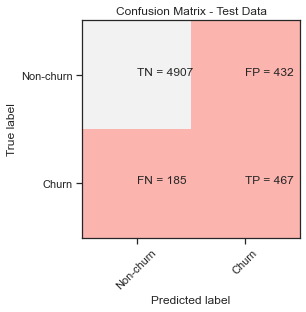

In [188]:
cm = confusion_matrix(y_test, preds_RFC)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

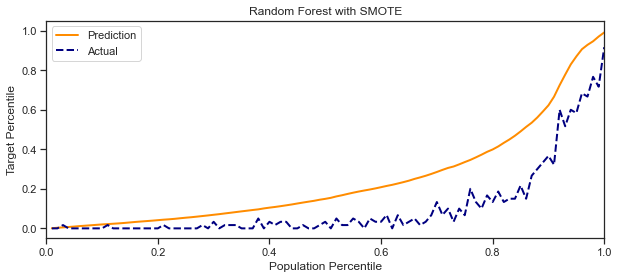

In [189]:
plotLiftChart(y_test.values,preds_probs_RFC,"Random Forest with SMOTE")

In [190]:
importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

value                        colName
0     0.10                   loc_ic_mou_8
1     0.09               loc_og_t2t_mou_8
2     0.08         is_loc_ic_t2m_mou_flag
3     0.07                   offnet_mou_8
4     0.05                         arpu_8
5     0.05               loc_ic_t2t_mou_8
6     0.05         is_loc_og_t2m_mou_flag
7     0.04               loc_ic_t2m_mou_8
8     0.04        date_of_last_rech_day_8
9     0.04             is_loc_ic_mou_flag
10    0.02                 max_rech_amt_8
11    0.02         is_loc_og_t2f_mou_flag
12    0.02                   loc_og_mou_8
13    0.01         is_std_og_t2m_mou_flag
14    0.01             is_offnet_mou_flag
15    0.01         is_loc_ic_t2f_mou_flag
16    0.01         is_loc_ic_t2t_mou_flag
17    0.01                     aug_vbc_3g
18    0.01             is_loc_og_mou_flag
19    0.01             is_std_ic_mou_flag
20    0.01         is_loc_og_t2t_mou_flag
21    0.01         is_std_ic_t2m_mou_flag
22    0.01                  roam_ic_mou_8
23    0.01            is_roam_og_mou_flag
24    0.01              std_og_mou_8diff7
25    0.01          total_rech_amt_8diff7
26    0.01              is_vol_2g_mb_flag
27    0.01       date_of_last_rech_8diff7
28    0.01         is_total_rech_amt_flag
29    0.01           is_total_og_mou_flag
30    0.01             is_spl_og_mou_flag
31    0.01             is_std_og_mou_flag
32    0.01             roam_og_mou_8diff7
33    0.01              is_vol_3g_mb_flag
34    0.01                      fb_user_8
35    0.01                  roam_og_mou_8
36    0.00           is_total_ic_mou_flag
37    0.00              is_onnet_mou_flag
38    0.00               loc_og_t2m_mou_8
39    0.00             last_day_rch_amt_8
40    0.00             roam_ic_mou_8diff7
41    0.00             AVG_offnet_mou_6_7
42    0.00              is_ic_others_flag
43    0.00                    vol_3g_mb_8
44    0.00              loc_ic_mou_8diff7
45    0.00         is_std_ic_t2t_mou_flag
46    0.00            is_roam_ic_mou_flag
47    0.00          std_og_t2t_mou_8diff7
48    0.00                max_rech_data_8
49    0.00             AVG_std_og_mou_6_7
50    0.00              total_rech_data_8
51    0.00                 is_vbc_3g_flag
52    0.00             av_rech_amt_data_8
53    0.00                AVG_fb_user_6_7
54    0.00          loc_og_t2t_mou_8diff7
55    0.00                   std_og_mou_8
56    0.00                  vbc_3g_8diff7
57    0.00                   AVG_arpu_6_7
58    0.00         is_std_ic_t2f_mou_flag
59    0.00             AVG_loc_ic_mou_6_7
60    0.00                 max_rech_amt_7
61    0.00          std_og_t2m_mou_8diff7
62    0.00         is_std_og_t2t_mou_flag
63    0.00               total_rech_num_8
64    0.00                            aon
65    0.00         AVG_loc_ic_t2t_mou_6_7
66    0.00                      arpu_3g_8
67    0.00            total_ic_mou_8diff7
68    0.00         AVG_loc_og_t2m_mou_6_7
69    0.00            AVG_roam_og_mou_6_7
70    0.00             AVG_spl_og_mou_6_7
71    0.00         AVG_loc_ic_t2m_mou_6_7
72    0.00         is_loc_og_t2c_mou_flag
73    0.00             last_day_rch_amt_6
74    0.00                    onnet_mou_8
75    0.00             is_isd_ic_mou_flag
76    0.00               loc_og_t2f_mou_8
77    0.00                 max_rech_amt_6
78    0.00             is_spl_ic_mou_flag
79    0.00          loc_ic_t2t_mou_8diff7
80    0.00                 AVG_vbc_3g_6_7
81    0.00   date_of_last_rech_data_day_8
82    0.00              AVG_vol_3g_mb_6_7
83    0.00        date_of_last_rech_day_7
84    0.00          loc_ic_t2m_mou_8diff7
85    0.00         AVG_loc_og_t2c_mou_6_7
86    0.00             AVG_monthly_3g_6_7
87    0.00               og_others_7diff6
88    0.00            AVG_roam_ic_mou_6_7
89    0.00             AVG_monthly_2g_6_7
90    0.00          loc_og_t2f_mou_8diff7
91    0.00              total_rech_data_6
92    0.00                    vol_2g_mb_8
93    0.00              spl_og_mou_8diff7
94    0.00     

<Figure size 720x288 with 0 Axes>

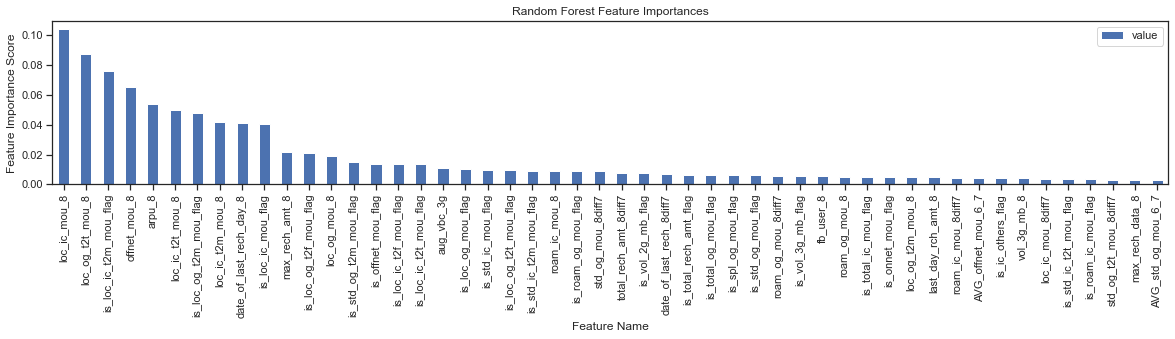

In [191]:
plt.clf()
from pylab import rcParams
rcParams['figure.figsize'] = 20, 3
sorted_feature_importance[0:50].plot(x='colName', y='value' , kind='bar', title='Random Forest Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Name')

plt.show()

### XG Boost

Dados reamostrados

In [192]:

xgb_model = xgb.XGBClassifier(
    n_estimators=250,
    learning_rate=0.05,
    n_jobs=4,
    max_depth=8,
    colsample_bytree=0.55,
    gamma=0.23,
    cv = None,
    scoring='f1_weighted'
)

xgb_model1 = xgb_model.fit(X_train_res,y_train_res)

[19:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { scoring } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [193]:
predictions_train = xgb_model1.predict(X_train_res)
print(classification_report(y_train_res, predictions_train))
predictions = xgb_model1.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     21359
           1       0.99      0.99      0.99     21359

    accuracy                           0.99     42718
   macro avg       0.99      0.99      0.99     42718
weighted avg       0.99      0.99      0.99     42718

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5339
           1       0.67      0.64      0.66       652

    accuracy                           0.93      5991
   macro avg       0.81      0.80      0.81      5991
weighted avg       0.93      0.93      0.93      5991



In [194]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,fbeta_score
accuracy = accuracy_score(y_test, predictions)
precision_recall_fscore_support(y_test, predictions, average='macro')
precision, recall, f1score,blah  = precision_recall_fscore_support(y_test, predictions, average='macro')
fbetascore = fbeta_score(y_test, predictions, average='weighted', beta=0.8)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision*100))
print("Recall: %.2f%%" % (recall*100))
print("F1 Score: %.2f%%" % (f1score*100))
print("F Beta score: %.2f%%" % (fbetascore*100))
print("Specificity: %.2f%%" % (specificity*100))
print("Sensitivty: %.2f%%" % (sensitivity*100))

Accuracy: 92.67%
Precision: 81.35%
Recall: 80.20%
F1 Score: 80.76%
F Beta score: 92.59%
Specificity: 96.14%
Sensitivty: 64.26%


the AUC is : 0.9327


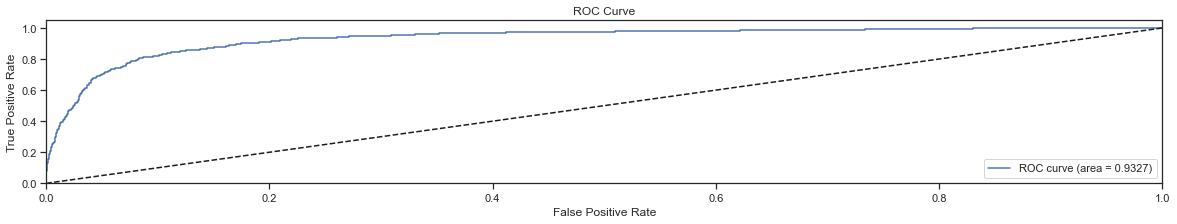

In [195]:
Performance(Model=xgb_model1,Y=y_test,X=X_test)

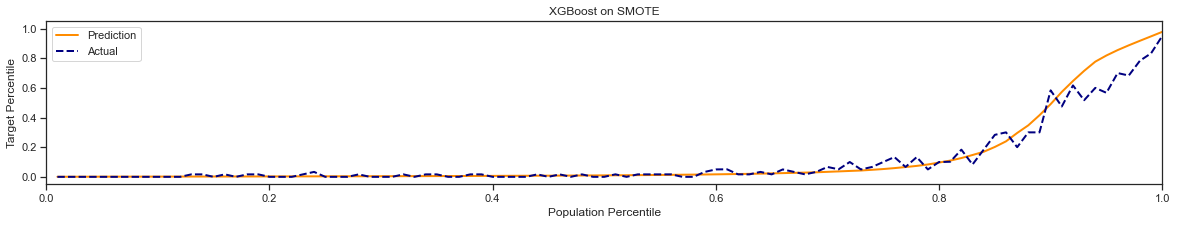

In [196]:
plotLiftChart(y_test.values,xgb_model1.predict_proba(X_test)[:,1],"XGBoost on SMOTE")

In [197]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model1.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

Importance
Feature                                  
loc_ic_mou_8                         0.12
is_loc_og_t2m_mou_flag               0.04
loc_ic_t2m_mou_8                     0.03
is_vbc_3g_flag                       0.03
is_total_og_mou_flag                 0.03
is_loc_ic_t2m_mou_flag               0.03
is_loc_og_t2t_mou_flag               0.03
is_loc_og_t2f_mou_flag               0.03
is_std_ic_mou_flag                   0.02
is_std_og_mou_flag                   0.02
is_onnet_mou_flag                    0.02
is_loc_ic_t2t_mou_flag               0.02
loc_og_t2m_mou_8                     0.02
date_of_last_rech_day_8              0.02
is_loc_ic_t2f_mou_flag               0.02
is_offnet_mou_flag                   0.02
fb_user_8                            0.02
loc_og_mou_8                         0.02
is_std_ic_t2m_mou_flag               0.01
is_vol_2g_mb_flag                    0.01
is_loc_og_mou_flag                   0.01
is_ic_others_flag                    0.01
is_spl_og_mou_flag                   0.01
is_std_ic_t2f_mou_flag               0.01
is_spl_ic_mou_flag                   0.01
max_rech_amt_8                       0.01
is_std_ic_t2t_mou_flag               0.01
last_day_rch_amt_8                   0.01
av_rech_amt_data_8                   0.01
roam_og_mou_8                        0.01
is_vol_3g_mb_flag                    0.01
date_of_last_rech_day_6              0.01
is_roam_ic_mou_flag                  0.01
is_total_ic_mou_flag                 0.01
max_rech_data_8                      0.01
is_loc_ic_mou_flag                   0.01
is_roam_og_mou_flag                  0.01
roam_ic_mou_8                        0.01
is_isd_ic_mou_flag                   0.01
is_std_og_t2t_mou_flag               0.01
roam_og_mou_8diff7                   0.01
is_loc_og_t2c_mou_flag               0.01
date_of_last_rech_8diff7             0.01
is_std_og_t2m_mou_flag               0.01
arpu_8                               0.01
aug_vbc_3g                           0.00
total_rech_num_8                     0.00
AVG_std_og_mou_6_7                   0.00
AVG_monthly_2g_6_7                   0.00
AVG_spl_ic_mou_6_7                   0.00
last_day_rch_amt_7                   0.00
AVG_sachet_3g_6_7                    0.00
is_isd_og_mou_flag                   0.00
last_day_rch_amt_6                   0.00
count_rech_3g_6                      0.00
AVG_fb_user_6_7                      0.00
total_rech_data_8                    0.00
is_arpu_2g_flag                      0.00
date_of_last_rech_day_7              0.00
total_rech_amt_8diff7                0.00
monthly_2g_8                         0.00
std_og_mou_8                         0.00
is_total_rech_amt_flag               0.00
AVG_loc_og_t2c_mou_6_7               0.00
count_rech_3g_7                      0.00
date_of_last_rech_data_8diff7        0.00
AVG_total_og_mou_6_7                 0.00
offnet_mou_8                         0.00
is_sachet_2g_flag                    0.00
max_rech_amt_7                       0.00
AVG_vbc_3g_6_7                       0.00
AVG_og_others_6_7                    0.00
std_og_mou_8diff7                    0.00
isd_og_mou_8                         0.00
spl_ic_mou_8diff7                    0.00
AVG_loc_og_mou_6_7                   0.00
vol_3g_mb_8                          0.00
max_rech_amt_6                       0.00
aon                                  0.00
AVG_std_ic_t2t_mou_6_7               0.00
total_rech_data_7                    0.00
AVG_roam_ic_mou_6_7                  0.00
count_rech_3g_8                      0.00
total_rech_data_6                    0.00
og_others_7diff6                     0.00
date_of_last_rech_data_day_8         0.00
is_night_pck_user_flag               0.00
AVG_spl_og_mou_6_7                   0.00
date_of_last_rech_7diff6             0.00
is_arpu_flag                         0.00
AVG_loc_og_t2f_mou_6_7               0.00
loc_ic_mou_8diff7                    0.00
spl_ic_mou_8                         0.00
AVG_loc_ic_t2f_mou_6_7               0.00

<AxesSubplot:xlabel='Feature'>

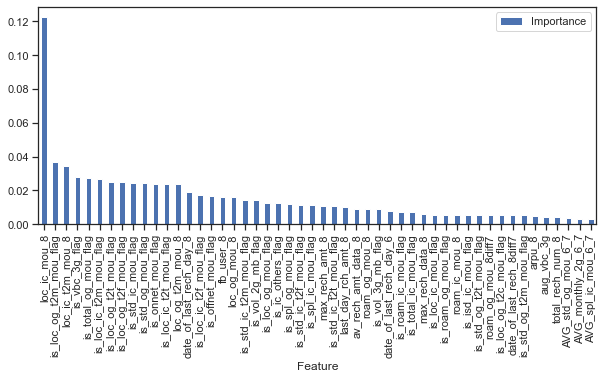

In [198]:
importances[0:50].plot.bar()

### SVM Linear

Dados reamostrados

In [199]:
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train_res, y_train_res)

SVC(kernel='linear')

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      5339
           1       0.40      0.83      0.54       652

    accuracy                           0.85      5991
   macro avg       0.69      0.84      0.73      5991
weighted avg       0.91      0.85      0.87      5991

Accuracy for the test dataset 84.8%
ROC for the test dataset 83.8%


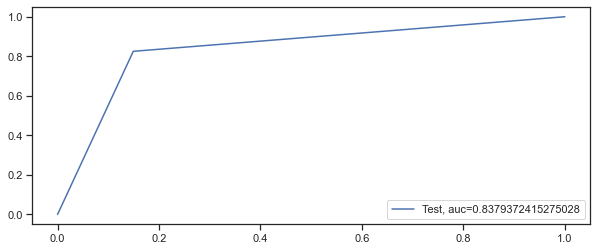

In [200]:
preds_SVM_li_RS = svm_linear.predict(X_test)
#preds_SVM_li_probs_RS = svm_linear.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_SVM_li_RS))
accuracy = metrics.accuracy_score(y_test, preds_SVM_li_RS)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_SVM_li_RS)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

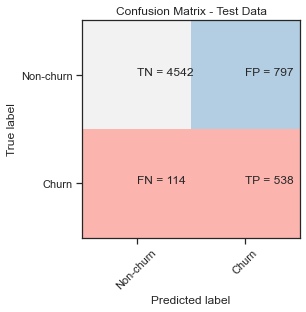

In [201]:
cm = confusion_matrix(y_test, preds_SVM_li_RS)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

### SVM Não-linear (RBF)

Em dados reamostrados

In [202]:
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train_res, y_train_res)

SVC()

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      5339
           1       0.51      0.74      0.60       652

    accuracy                           0.89      5991
   macro avg       0.74      0.83      0.77      5991
weighted avg       0.92      0.89      0.90      5991

Accuracy for the test dataset 89.4%
ROC for the test dataset 82.7%


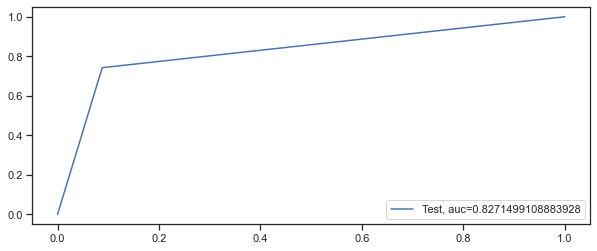

In [203]:
preds_SVM_RBF_RS = svm_rbf.predict(X_test)
#preds_SVM_RBF_probs_RS = svm_rbf.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_SVM_RBF_RS))
accuracy = metrics.accuracy_score(y_test, preds_SVM_RBF_RS)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_SVM_RBF_RS)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

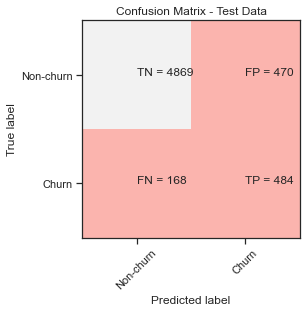

In [204]:
cm = confusion_matrix(y_test, preds_SVM_RBF_RS)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

## Resumo sobre os modelos

- Treinamos diferentes modelos de aprendizado de máquina para resolver esses problemas de classificação.
- Tanto o XGBoost quanto o Random Forest Classifier tiveram o melhor desempenho quando comparados com outros modelos.
- O ** Algorithmic Ensemble Techniques ** foi capaz de fornecer o mesmo desempenho dos modelos usando os dados das técnicas de reamostragem (o desempenho é quase o mesmo). Assim, com a opção de classe balanceada e K-fold estratificado, ainda podemos obter as mesmas pontuações sem aumentar o tamanho do conjunto de dados
- Nós consideramos a pontuação F1 e a área sob a curva como as principais métricas para a avaliação

#### Features importantes ou indicadores

In [205]:
importances = RF2.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
RF_feature_importance.head()

value             colName
0   0.15        loc_ic_mou_8
1   0.07    loc_og_t2m_mou_8
2   0.06    loc_ic_t2m_mou_8
3   0.05        loc_og_mou_8
4   0.04  last_day_rch_amt_8

In [206]:
imp_features = RF_feature_importance.head(20)

In [207]:
X_imp = df[list(imp_features .colName.unique())]
Y_imp = df['churn_flag']

In [208]:
X_imp_std = scaler.fit_transform(X_imp)
X_imp_train, X_imp_test, y_imp_train, y_imp_test = train_test_split(X_imp_std,Y_imp, train_size=0.8,test_size=0.2,random_state=111)

In [209]:
RF_imp=RandomForestClassifier(n_estimators=200, criterion= 'entropy', max_depth=15,random_state=111, class_weight='balanced')
RF_imp.fit(X_imp_train, y_imp_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, n_estimators=200, random_state=111)

In [210]:
RF_imp_pred_test = RF_imp.predict(X_imp_test)
print(classification_report(y_imp_test, RF_imp_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      5339
           1       0.65      0.65      0.65       652

    accuracy                           0.92      5991
   macro avg       0.80      0.80      0.80      5991
weighted avg       0.92      0.92      0.92      5991



the AUC is : 0.9266


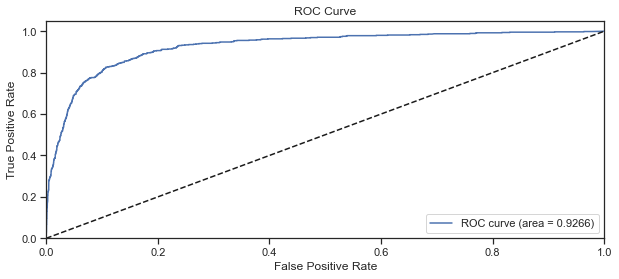

In [211]:
Performance(Model=RF_imp,Y=y_imp_test,X=X_imp_test)

Treinamos nosso algoritmo random forest nos 20 principais recursos que selecionamos acima e, em seguida, avaliamos o desempenho de nosso algoritmo nos conjuntos de treinamento e teste. Podemos ver que as pontuações AUC e F1 são muito semelhantes nos conjuntos de dados de treinamento e teste, o que significa que nosso modelo não está superdimensionado.

In [212]:
imp_features

value                   colName
0    0.15              loc_ic_mou_8
1    0.07          loc_og_t2m_mou_8
2    0.06          loc_ic_t2m_mou_8
3    0.05              loc_og_mou_8
4    0.04        last_day_rch_amt_8
5    0.03  date_of_last_rech_8diff7
6    0.03   date_of_last_rech_day_8
7    0.02     total_rech_amt_8diff7
8    0.02                    arpu_8
9    0.01        roam_og_mou_8diff7
10   0.01              offnet_mou_8
11   0.01                aug_vbc_3g
12   0.01          loc_ic_t2t_mou_8
13   0.01             roam_og_mou_8
14   0.01            max_rech_amt_8
15   0.01           max_rech_data_8
16   0.01                       aon
17   0.01          loc_og_t2t_mou_8
18   0.01        av_rech_amt_data_8
19   0.01       total_ic_mou_8diff7

Podemos observar que as principais features selecionadas pelo XG Boost & Random Forest são semelhantes. Portanto, podemos concluir que esses são os indicadores importantes de rotatividade.

## Recomendações ao negócio

- Do exposto, podemos inferir claramente que as chamadas relacionadas com entrada e saída dentro de um ciclo são a chave para identificar clientes de rotatividade;
- Especialmente o uso durante a pausa de ação quando comparado ao mês bom (7º mês) reduziu;
- O outro fator chave é se a quantidade de recarga mostra uma queda na fase de ação é sinal de rotatividade;
- Idade na rede também é um indicador chave para identificar a rotatividade, se aon for inferior a 500 dias e seu uso for reduzido, o cliente será rotacionado;
- O uso de dados móveis também diminuiu em comparação ao 7º mês. Portanto, o uso e a quantidade de dados também podem ser os outros recursos para entender o comportamento da rotatividade;